# Predicting and Understanding Student Depression Using Machine Learning: A Comprehensive Analysis of Contributing Factors


### Problem Statement

Depression is a common mental health problem affecting millions of people worldwide. According to the World Health Organisation (WHO), depression can significantly affect individuals' daily lives, reducing productivity at both individual and societal levels. However, early diagnosis and accurate categorisation of depression is critical to access appropriate treatment.

In this project, a machine learning model has been developed to classify depression symptoms and predict the possible depression states of individuals. The aim is to provide a technological solution to this critical health problem by using data science techniques and machine learning algorithms.

In [2]:
import numpy as np
import pandas as pd

## Understanding the Data

In [3]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head() # displaying the first 5 lines

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.tail() # displaying the last 5 lines

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


In [5]:
df.columns  # Are there any inconsistencies or gaps in the column names?

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

These column names need to be changed: **'Have You Ever Had Suicidal Thoughts ? ','Family History Of Mental Illness’**

Also these columns should be removed as they are not relevant to the analysis I am going to do: **‘id’, “Work Pressure”, ’Job Satisfaction’**

In [6]:
df.shape # Dimensions of the data set

(27901, 18)

In [7]:
df.dtypes # Checking the data types of all columns

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

**‘Age’, ‘Academic Pressure’, ‘Study Satisfaction’, ‘Work/Study Hours’, ‘Financial Stress’** columns should be converted to int data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [9]:
df.describe().round(3) # Basic statistics of numerical columns

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27901.000,27898.000,27901.000
mean,70442.149,25.822,3.141,0.000,7.656,2.944,0.001,7.157,3.140,0.585
std,40641.175,4.906,1.381,0.044,1.471,1.361,0.044,3.708,1.437,0.493
min,2.000,18.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,35039.000,21.000,2.000,0.000,6.290,2.000,0.000,4.000,2.000,0.000
50%,70684.000,25.000,3.000,0.000,7.770,3.000,0.000,8.000,3.000,1.000
75%,105818.000,30.000,4.000,0.000,8.920,4.000,0.000,10.000,4.000,1.000
max,140699.000,59.000,5.000,5.000,10.000,5.000,4.000,12.000,5.000,1.000


In [10]:
df.describe(include="object") # Basic statistics of categorical columns

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


In [11]:
df["Depression"].value_counts(normalize=True).to_frame() # target value

,proportion
Depression,
1,0.585499
0,0.414501


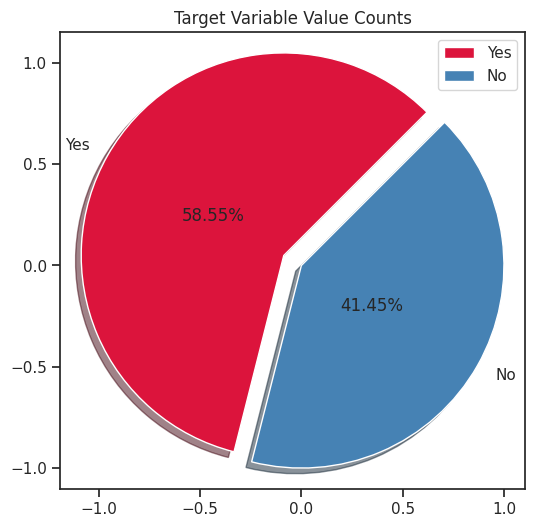

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualization of target value

plt.figure(figsize = (6, 6))
plt.pie(x = df['Depression'].value_counts(),labels = ['Yes', 'No'],shadow = True,\
        colors = ['crimson', 'steelblue'],autopct = '%0.2f%%',startangle = 45,explode = [0.1, 0],\
        frame = True,pctdistance = 0.4)
plt.title('Target Variable Value Counts')
plt.legend()
plt.show()

# Data Cleaning and Preprocessing

## 1. Data Cleaning

In [13]:
df.isna().sum() # Number of nan values by column

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [14]:
df.dropna(inplace=True) # since the number of nan values is not too much, I will drop them

In [15]:
df.duplicated().sum() # calculating duplicated values

0

In [16]:
df.drop(["id","Work Pressure","Job Satisfaction"],axis=1,inplace=True) # drop irrelavent columns
df.shape

(27898, 15)

In [17]:
df.columns = df.columns.str.title() # changes column names
df.rename(columns = {'Have You Ever Had Suicidal Thoughts ?': 'Suicidal Thoughts',\
                       'Family History Of Mental Illness': 'Family Mental History'}, inplace = True)

df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Cgpa',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Suicidal Thoughts', 'Work/Study Hours', 'Financial Stress',
       'Family Mental History', 'Depression'],
      dtype='object')

In [18]:
# converting columns float into int

convert_columns = ['Age', 'Academic Pressure','Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

for column in convert_columns:
    df[column] = df[column].astype("int64")

## 2. Preprocessing

First, I want to look at the frequency of values in columns with the **value_counts()** function. This will show me if there are any outliers in the values in the columns.

#### Gender

In [19]:
df["Gender"].value_counts().to_frame()

,count
Gender,
Male,15546
Female,12352


#### City

In [20]:
city_count = df["City"].value_counts()
city_count.to_frame()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1339
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


Since there are too many values with less than 3 frequencies, I found the solution **removing** these values.

In [21]:
filtered_city = df[df['City'].map(df['City'].value_counts()) <= 2]

df.drop(index = filtered_city.index, inplace = True)

df["City"].value_counts().to_frame()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1339
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


#### Profession

In [22]:
profession_counts = df["Profession"].value_counts()
profession_counts.to_frame()

,count
Profession,
Student,27841
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


Because of the analysis I will do, I exclude people from other professional groups.

In [23]:
df = df.query("Profession == 'Student'").reset_index(drop = True)
df["Profession"].value_counts().to_frame()

,count
Profession,
Student,27841


#### Academic Pressure

In [24]:
df["Academic Pressure"].value_counts().to_frame().sort_index()

,count
Academic Pressure,
0,9
1,4795
2,4168
3,7440
4,5146
5,6283


I remove the value 0 in this column because it has a very low frequency compared to other values. This is necessary to avoid overfitting in the model

In [25]:
df = df.query("`Academic Pressure` != 0").reset_index(drop=True) # Dropping values from 0
df.shape

(27832, 15)

#### Cgpa

In [26]:
df["Cgpa"] = df["Cgpa"].round(2)
df["Cgpa"].value_counts().to_frame().head()

,count
Cgpa,
8.04,821
9.96,425
5.74,409
8.95,370
9.21,342


In [27]:
df[df['Cgpa'] == 0].shape[0]

3

I remove the value 0 in this column because it has a very low frequency compared to other values. This is necessary to avoid overfitting in the model

In [28]:
df = df[df["Cgpa"] != 0]

#### Study Satisfaction

In [29]:
df["Study Satisfaction"].value_counts().to_frame().sort_index()

,count
Study Satisfaction,
0,2
1,5435
2,5827
3,5807
4,6345
5,4413


I remove the value 0 in this column because it has a very low frequency compared to other values. This is necessary to avoid overfitting in the model

In [30]:
df = df.query("`Study Satisfaction` != 0").reset_index(drop=True)
df.shape

(27827, 15)

#### Sleep Duration

In [31]:
df["Sleep Duration"].value_counts().to_frame()

,count
Sleep Duration,
Less than 5 hours,8287
7-8 hours,7325
5-6 hours,6167
More than 8 hours,6030
Others,18


I remove the value others in this column because it has a very low frequency compared to other values. This is necessary to avoid overfitting in the model

In [32]:
df = df.query("`Sleep Duration` != 'Others'").reset_index(drop=True)

#### Dietary Habits

In [33]:
df["Dietary Habits"].value_counts().to_frame()

,count
Dietary Habits,
Unhealthy,10282
Moderate,9890
Healthy,7625
Others,12


I remove the others value in this column because its frequency is too low compared to the other values. This is necessary to prevent overfitting in the model.

In [34]:
df = df.query("`Dietary Habits` != 'Others'").reset_index(drop=True)

#### Degree

In [35]:
df["Degree"].value_counts().to_frame()

,count
Degree,
Class 12,6064
B.Ed,1858
B.Com,1502
B.Arch,1475
BCA,1428
MSc,1183
B.Tech,1151
MCA,1038
M.Tech,1019


I remove the others value in this column because its frequency is too low compared to the other values.

In [36]:
df = df.query("`Degree` != 'Others'").reset_index(drop = True)
df.shape

(27762, 15)

#### Suicidal Thoughts

In [37]:
df["Suicidal Thoughts"].value_counts().to_frame()

,count
Suicidal Thoughts,
Yes,17564
No,10198


#### Family Mental History

In [38]:
df["Family Mental History"].value_counts().to_frame()

,count
Family Mental History,
No,14321
Yes,13441


### Exploring Outliers Values on Numerical Columns

Detecting and handling outliers on numerical columns is critical to improve model accuracy and stability. Outliers can distort predictions by biasing model parameters, mislead the distribution and summary statistics, and increase the risk of over-fitting. Checking these values during data preprocessing improves the model's generalization performance and interpretability, while ensuring that measurement errors or extreme events are handled correctly. Furthermore, as the nature of outliers may carry important business context information, it may be necessary to mitigate their impact through appropriate methods or keep them in the analysis rather than removing them outright. In this process, statistical methods such as IQR or z-score can be used, as well as modern algorithms such as transformation techniques and isolation forests. I will use the Z-Score technique.

In [39]:
numerical_columns = df.select_dtypes(include=[np.number]).columns # select only numeric columns

In [40]:
# Detecting outliers with the z-score method

from scipy.stats import zscore

data_zscore = df[numerical_columns].apply(zscore)

z_score_outliers = df[(data_zscore.abs() > 3).any(axis = 1)].reset_index().drop('index', axis = 1)
z_score_outliers

,Gender,Age,City,Profession,Academic Pressure,Cgpa,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental History,Depression
0,Female,42,Rajkot,Student,2,9.03,5,More than 8 hours,Moderate,Class 12,Yes,3,1,Yes,0
1,Female,58,Chennai,Student,4,8.58,1,7-8 hours,Healthy,Class 12,No,4,4,No,0
2,Male,49,Nagpur,Student,3,6.47,3,5-6 hours,Moderate,Class 12,Yes,2,1,Yes,0
3,Female,51,Bhopal,Student,2,8.26,3,Less than 5 hours,Moderate,MBBS,Yes,5,5,Yes,0
4,Female,44,Srinagar,Student,1,6.83,3,Less than 5 hours,Unhealthy,BSc,No,4,3,No,0
5,Male,43,Rajkot,Student,5,5.64,2,5-6 hours,Moderate,B.Ed,No,9,4,Yes,1
6,Male,46,Nashik,Student,1,6.10,3,7-8 hours,Unhealthy,PhD,No,4,2,No,0
7,Male,59,Nashik,Student,1,8.14,1,5-6 hours,Unhealthy,PhD,Yes,10,4,Yes,0
8,Male,42,Kolkata,Student,5,6.10,1,Less than 5 hours,Healthy,MBBS,Yes,10,4,No,1
9,Male,54,Agra,Student,5,9.60,2,More than 8 hours,Unhealthy,B.Ed,Yes,9,3,Yes,0


In [41]:
# remove outliers

outliers_index = df[(data_zscore.abs() > 3).any(axis=1)].index

df = df.drop(outliers_index, axis=0)

**Reason for Removing Outliers:** The reason I remove outliers is to increase the accuracy of the data and the reliability of the analysis results. Outliers are observations that deviate significantly from the overall trend of the data set and can lead to misleading results during analysis. Therefore, I aim to obtain more consistent and accurate results by detecting and removing such values.
The 19 outliers I found could have introduced biases in the data set that could significantly affect the analysis results. Since 19 is not too many, I chose to remove it. In this way, I aimed to increase the accuracy and reliability of my analysis.

In [42]:
# checking the number of outliers

data_zscore = df[numerical_columns].apply(zscore)
z_score_outliers = df[(data_zscore.abs() > 3).any(axis=1)]

print(len(z_score_outliers))

0


### Exploring Skewnees Values on Numerical Columns

Skewness on the numerical columns indicates that the distribution of the data is not symmetric and is concentrated in a particular direction. Skewed data can negatively affect forecasting performance, especially in models based on assumptions such as linear regression, logistic regression, etc., since these models are usually based on the assumption of a normal distribution. Positive or negative skewness can lead to the model producing biased results, overrepresentation of certain classes or values. Therefore, detecting skewness and, if necessary, correcting it with transformations (e.g. logarithmic, square root) or other techniques allows the model to produce more consistent and reliable results. This optimizes the model's learning process and improves the accuracy of predictions.

In [43]:
skewness = df[numerical_columns].skew().round(3).to_frame().reset_index().rename(columns={"index":"features",0:"skewness"})
skewness

,features,skewness
0,Age,0.073
1,Academic Pressure,-0.134
2,Cgpa,-0.074
3,Study Satisfaction,0.012
4,Work/Study Hours,-0.458
5,Financial Stress,-0.130
6,Depression,-0.347


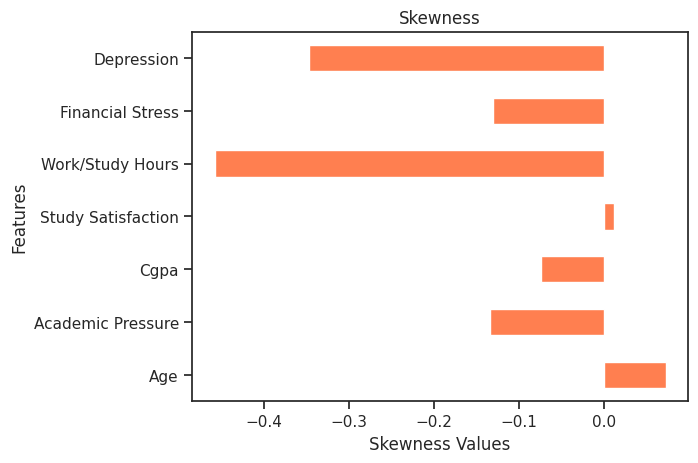

In [44]:
# visualization of skewed values

ax = skewness.plot(kind = 'barh',title = 'Skewness',color = 'coral',legend = False)

ax.set_yticklabels(['Age', 'Academic Pressure','Cgpa', 'Study Satisfaction','Work/Study Hours', 'Financial Stress',"Depression"])
ax.set_xlabel('Skewness Values')
ax.set_ylabel('Features')
plt.show()

### Data Overview

In [45]:
# an overview of the data as I will now start EDA

for i in df.columns:
    print(f'{df[i].name} --> unique count: {df[i].nunique()}')
    print(f'unique values: {df[i].unique()}')
    print('-' * 90)

print(df.shape,'\n')

Gender --> unique count: 2
unique values: ['Male' 'Female']
------------------------------------------------------------------------------------------
Age --> unique count: 22
unique values: [33 24 31 28 25 29 30 27 19 20 23 18 21 22 34 32 26 39 35 36 38 37]
------------------------------------------------------------------------------------------
City --> unique count: 30
unique values: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi']
------------------------------------------------------------------------------------------
Profession --> unique count: 1
unique values: ['Student']
------------------------------------------------------------------------------------------
Academic Pressure --> unique count: 5
unique values: [5 2 3 4 1

# Exploratory Data Analysis

## 1. Exploration of Numerical Columns

Since I have already done the basic statistics (mean, median, standard deviation, min and max values,skewness,outliers etc.) in the numeric columns, I will only create visualizations here

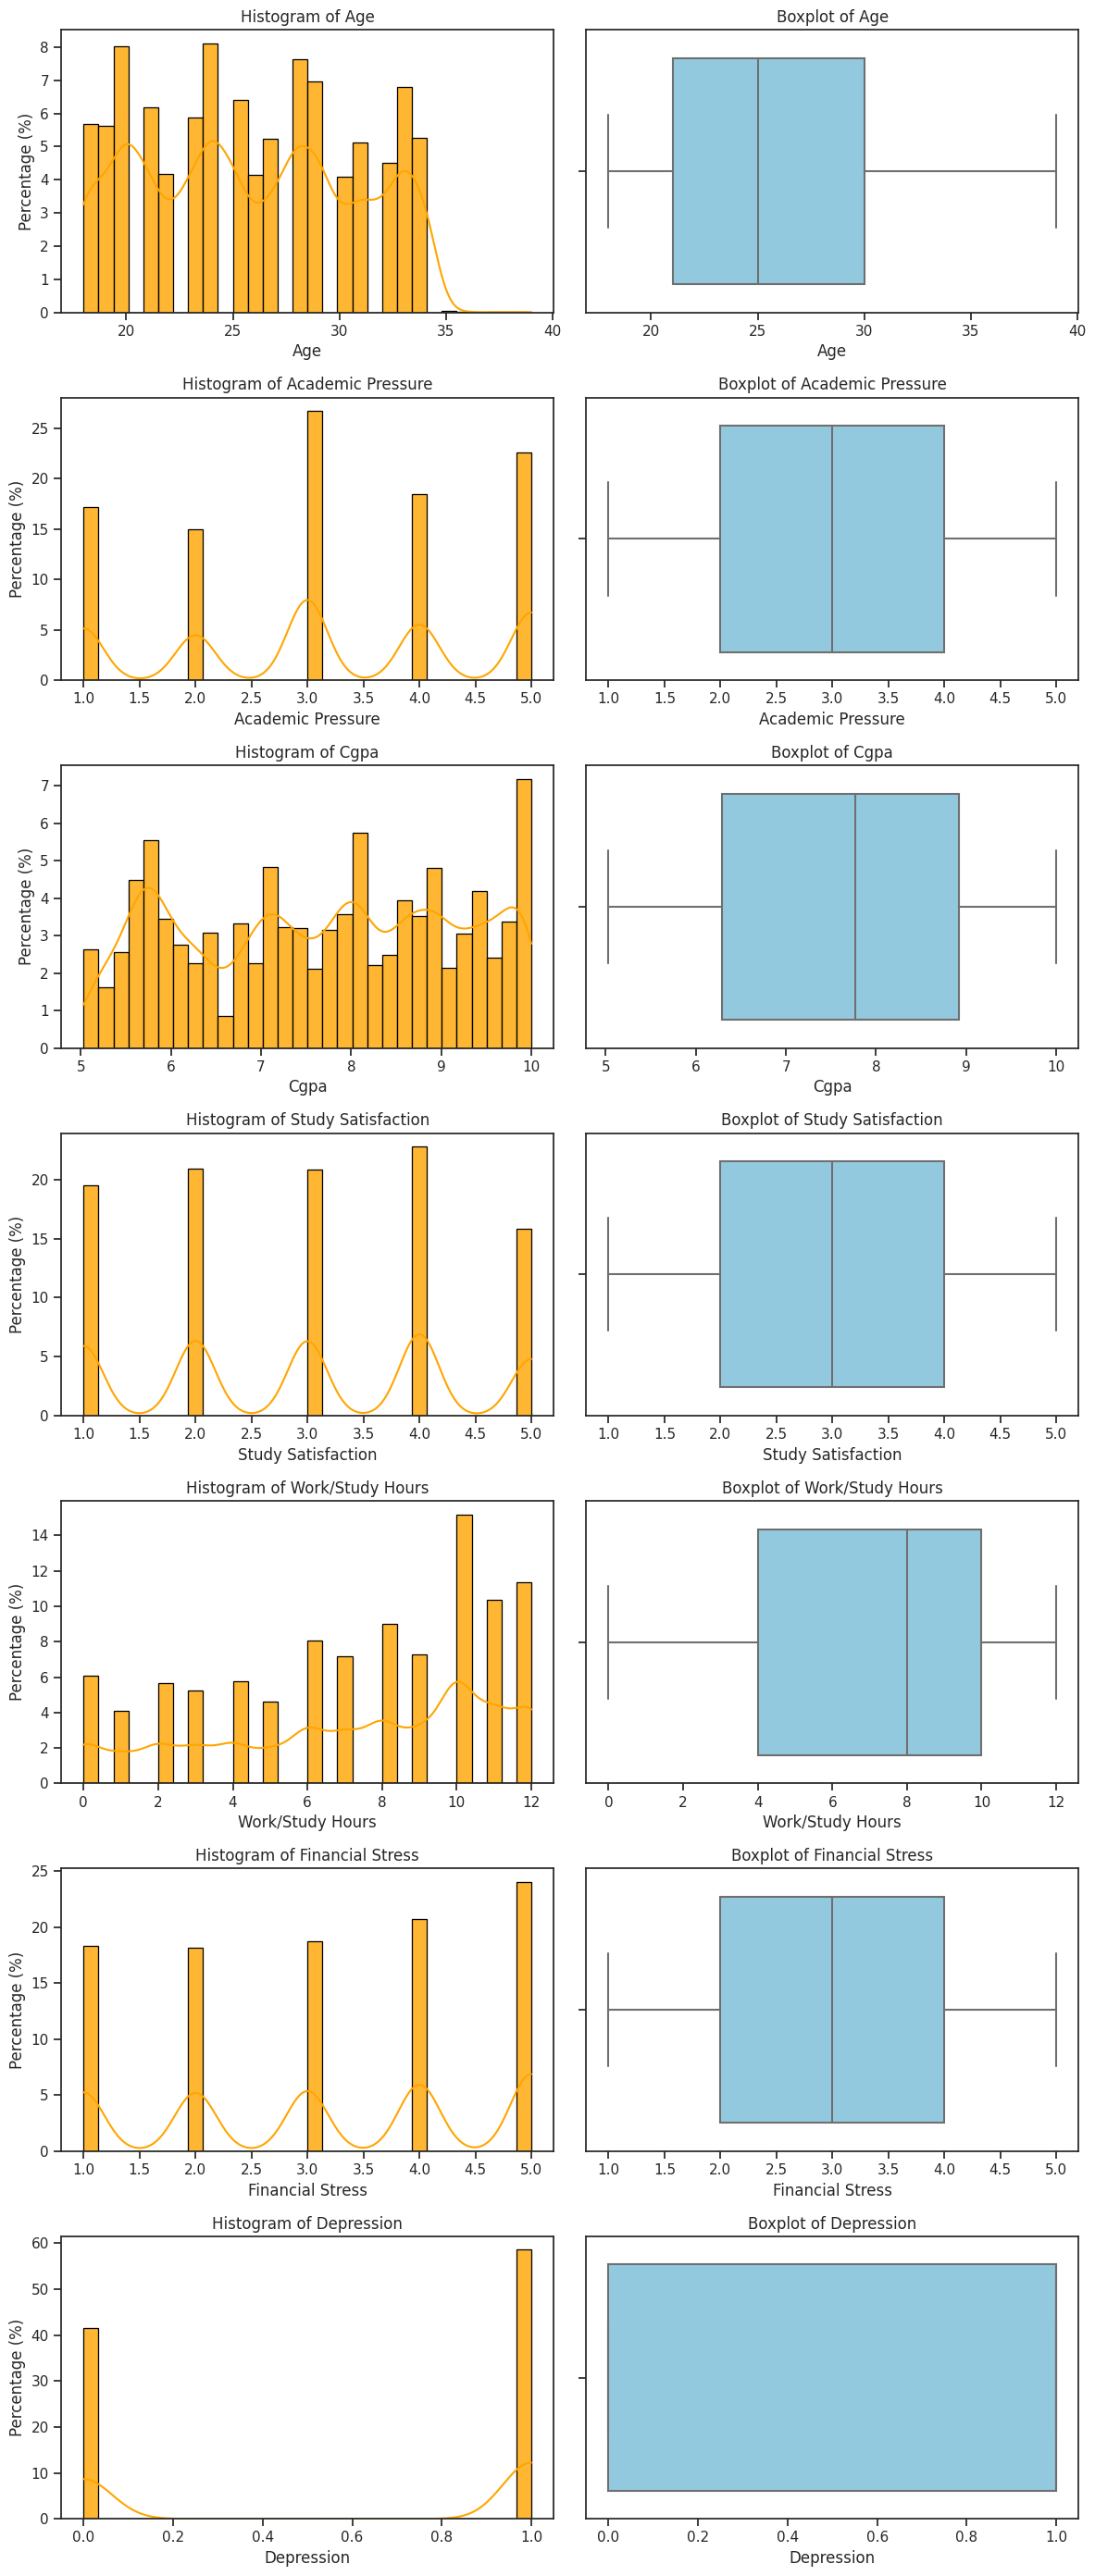

In [46]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 4))

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], kde=True,stat="percent", ax=axes[i, 0], color='orange',edgecolor = 'black',bins=30,alpha=0.8)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Percentage (%)')

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Boxplot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

## 2. Exploration of Categorical Columns

Since I have done the basic statistics for categorical columns (with the describe function and value counts) I will only do the visualizations

In [47]:
categorical_columns = df.select_dtypes(include='object').columns # select categorical columns only

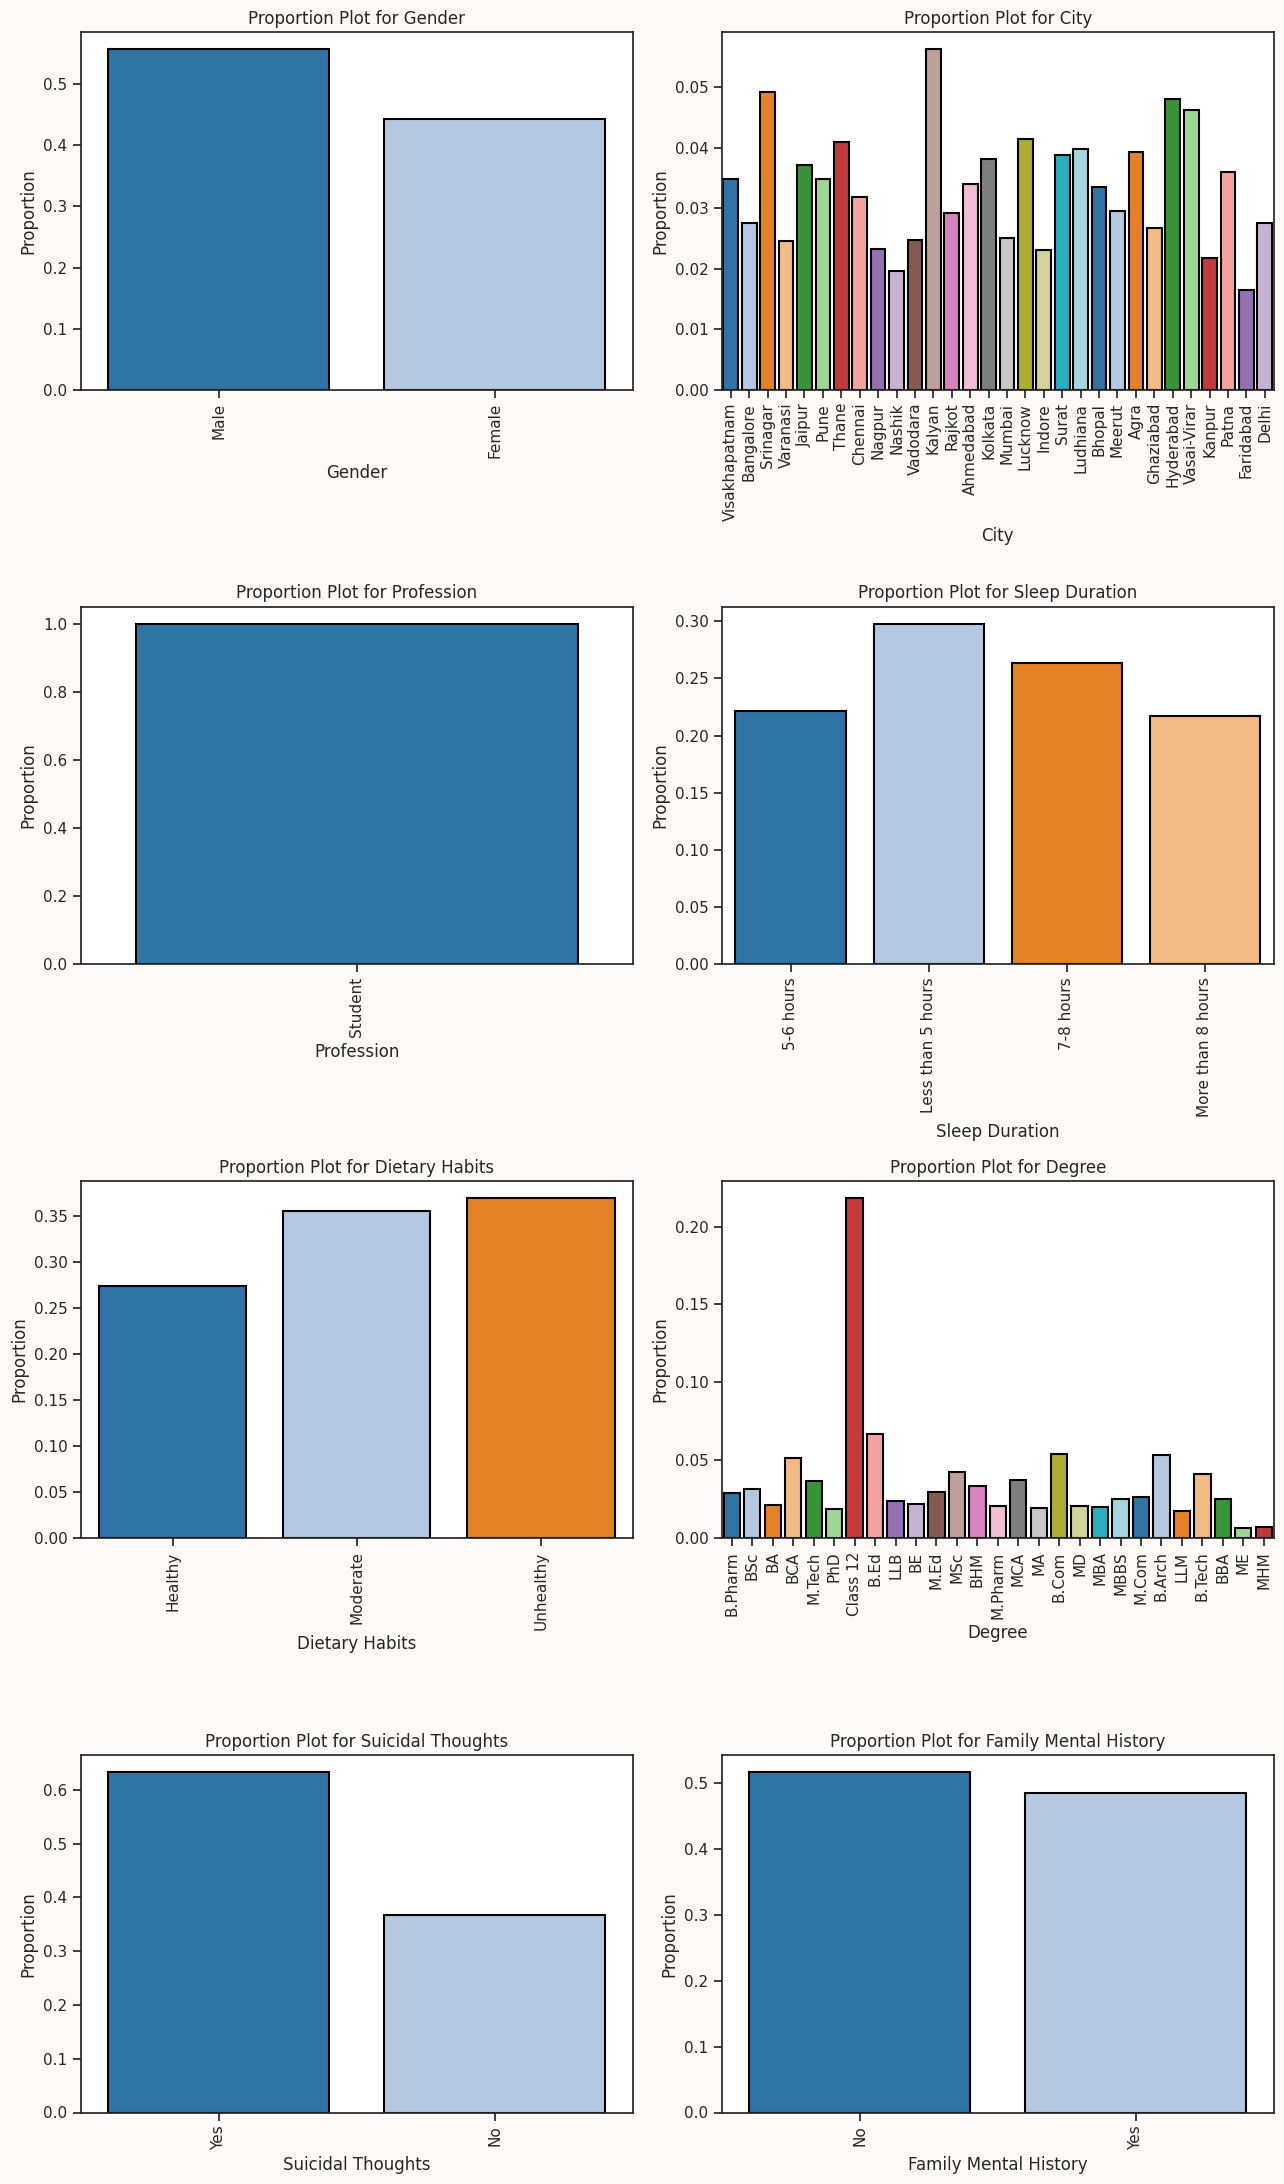

In [48]:
# creating a barplot

fig, axes = plt.subplots(4, 2, figsize=(13, 22), facecolor='snow')
axes = axes.flatten()

for ax, col in zip(axes, categorical_columns):
    proportions = df[col].value_counts(normalize=True,sort=False)
    
    sns.barplot(x=proportions.index, y=proportions.values, palette='tab20',
                dodge=True, edgecolor='black', linewidth=1.5, saturation=0.8, ax=ax)
    
    ax.set_title(f'Proportion Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Proportion')
    
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

## 3. Create ANOVA and ttest_ind Functions

**Reason for Using ANOVA Test:** It uses the ANOVA test to determine whether the means of multiple groups and the difference between them are significant. I also prefer this test so that you can use the power between categorical columns and numerical columns. This way I can understand whether the differences between variables are coincidental or really important.


In [49]:
from scipy.stats import f_oneway

def perform_anova(data,group_col,target_col):
    """
    Applies one-way ANOVA test.
    
    Args:
        data: Dataframe
        group_col (str): Categorical variable column (Sleep Duration etc.)
        target_col (str): Numeric variable column (Depression)
        
    Returns:
        f-statistic and p-value
    """
    groups = [data[data[group_col] == category][target_col] for category in data[group_col].unique()]
    f_statistic,p_value = f_oneway(*groups)
    return f_statistic,p_value

**Reason for Using t-Test:** The t-test is used to compare the means of two groups and determine whether the difference between them is statistically significant. Thanks to this test, it can be understood whether the differences between groups are random or really important. I also use the t-test to evaluate the strength of the relationship between two numerical columns. It is an effective method for detecting significant differences between two groups or two numerical columns and assessing the strength of these differences.

In [50]:
from scipy.stats import ttest_ind

def perform_ttest(data,group_col,target_col):
    """
    Applies t-test between two groups
    
    Args:
        data: DataFrame
        group_col (str): Group variable column (Depression)
        target_col (str): Numeric variable column (Age etc.)
        
    Returns:
    t-statistic and p-value
    """
    group1 = data[data[group_col] == 1][target_col]
    group2 = data[data[group_col] == 0][target_col]
    t_stat,p_value = ttest_ind(group1,group2)
    return t_stat,p_value

## 4. Exploratory Analysis on the Data Set

### 1. Relationship between Gender, Age and Depression

#### Purpose of the Analysis:
I am doing this analysis to understand the effects of age and gender on depression. How do levels of depression change as people get older? What are the rates of depression in different genders? I am trying to answer these questions.

***Columns to be used:***

* Gender
* Age
* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs age) and ANOVA (depression vs gender)

* Barplot

In [51]:
f_stat, p_val = perform_anova(df, group_col='Gender', target_col='Depression') # implementing anova test

print("f-stat:",f_stat)
print("p-value:",p_val)

f-stat: 0.053266627153680746
p-value: 0.8174752710514586


In this analysis, I examined the effect of gender on depression and the results showed that gender made **no significant difference** on depression levels. The f-statistic is very small and the p-value is well above 0.05. This shows that gender does not significantly affect depression levels. In other words, there is no significant difference in depression levels between men and women in this sample.

In [52]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Age') # implementing ttest_ind

print("t-stat:",t_stat)
print("p-value:",p_val)

t-stat: -38.821871595493086
p-value: 0.0


In this analysis I tried to examine the effect of age on depression and the results are really striking. The t-statistic value is negative and large and the p-value is less than 0.05. The fact that the t-statistic value is so large and negative shows that age makes a significant difference in depression levels. In other words, **depression may be more common in younger people**. The p-value is well below 0.05 and proves that this result is **statistically significant**. In other words, depression levels change significantly as we age and the age factor seems to play a significant role in depression.

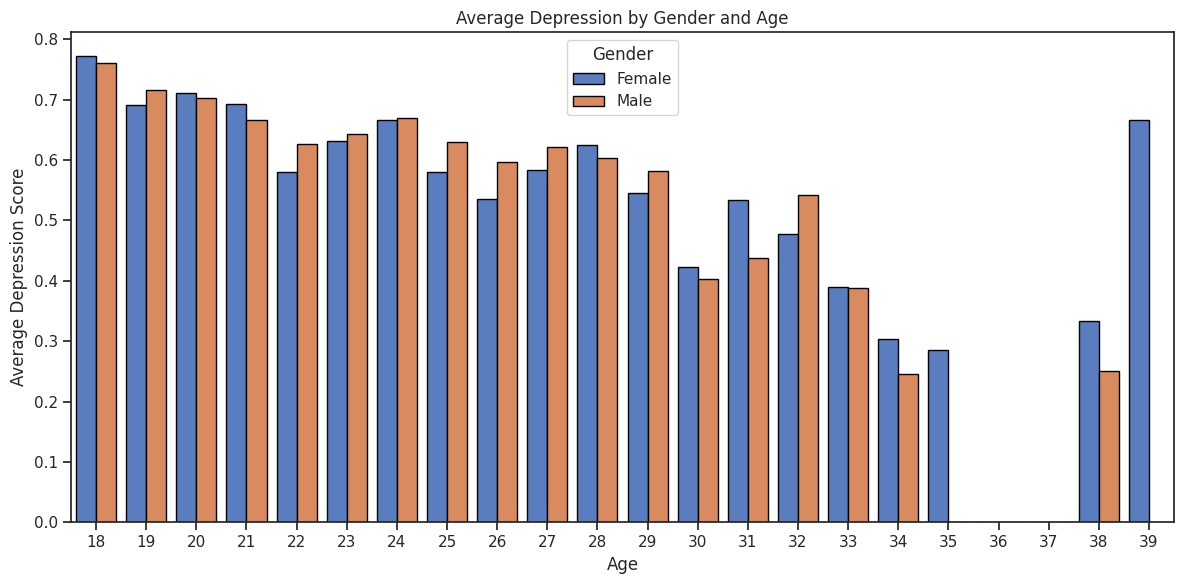

In [53]:
filtered_data = df.groupby(['Gender', 'Age'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Age',y = 'Depression',hue = 'Gender',palette = 'muted',edgecolor = 'black')

plt.title('Average Depression by Gender and Age')
plt.ylabel('Average Depression Score')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In general, I can see how depression scores change with age. At younger ages (e.g. 18-19 years old) depression scores are quite high. However, as I get older (up to the mid-20s) I observe that depression scores drop, suggesting that levels of depression decrease with age.

Interestingly, however, from the early 30s onwards, I see depression scores increase again in men, with a particularly marked increase around the age of 35. For women, depression scores decline more consistently, but there is a slight increase after age 35.

This graph clearly shows the effects of age and gender on depression

### 2. Relationship Between Gender, Suicidal Thoughts and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of suicidal ideation and gender on depression. How are depression levels affected as people's suicidal ideation changes? What are suicidal thoughts in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Suicidal Thoughts

* Depression

***Statistics and Visualizations to be used:***

* ANOVA (depression vs suicidal thoughts)

* Barplot

In [54]:
f_stat, p_val = perform_anova(df, group_col='Suicidal Thoughts', target_col='Depression')

print("f-stat:",f_stat)
print("p-value:",p_val)

f-stat: 11879.419595615009
p-value: 0.0


The results of this ANOVA test are quite striking. The f-statistic is incredibly high. This indicates that there is a very strong variance between the dependent variables. In other words, there is a significant difference between suicidal thoughts and depression scores.

The results show that individuals with suicidal thoughts have significantly different (and probably higher) depression scores. A p-value of 0.0 indicates that this relationship is **highly statistically significant**. In other words, there is clearly no causal relationship between the two conditions.

This data is important for mental health professionals. It shows that suicidal thoughts can be a serious symptom of depression.

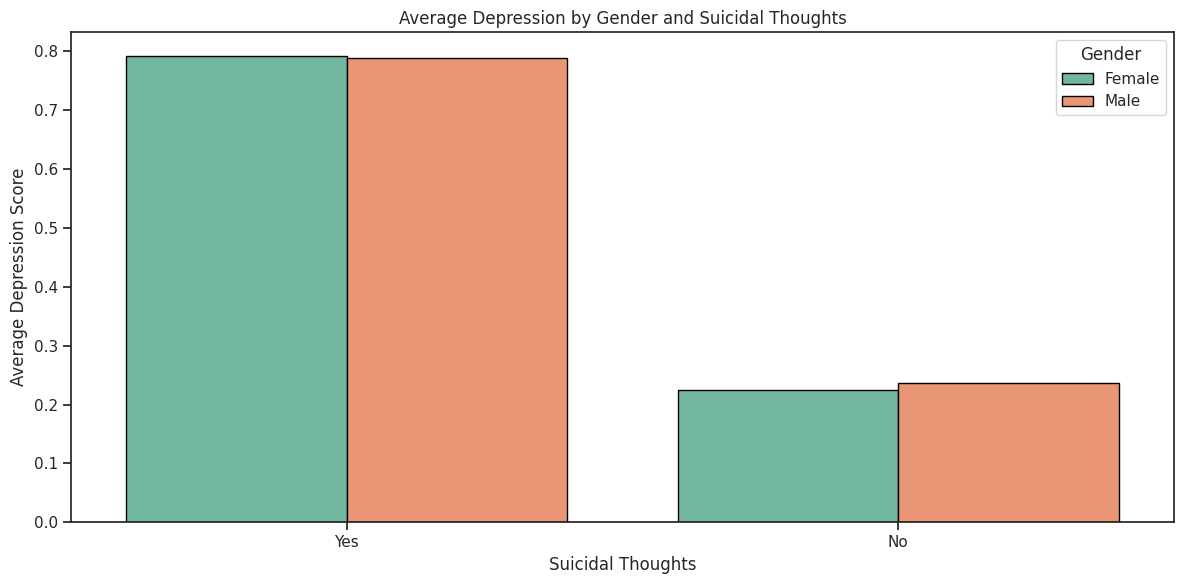

In [55]:
filtered_data = df.groupby(['Gender', 'Suicidal Thoughts'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Suicidal Thoughts',y = 'Depression',hue = 'Gender',palette = 'Set2',edgecolor = 'black')

plt.title('Average Depression by Gender and Suicidal Thoughts')
plt.ylabel('Average Depression Score')
plt.xlabel('Suicidal Thoughts')
plt.tight_layout()
plt.show()

“Yes” respondents: For both men and women, the depression score is quite high, almost 0.8. This indicates that those who have suicidal thoughts have serious levels of depression.

“No” respondents: Depression scores are much lower, around 0.2. This suggests that those who do not have suicidal thoughts have lower levels of depression.

What we can conclude from this graph is that suicidal thoughts are strongly linked to depression. This is the case for both men and women, so this relationship holds regardless of gender.

This kind of data reminds us how serious and interconnected suicidal thoughts and depression are.

### 3. Relationship Between Gender, Academic Pressure and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of academic pressure and gender on depression. How are people's levels of depression affected as their levels of academic pressure change? What are the levels of academic pressure in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Academic Pressure

* Depression 

***Statistics and Visualizations to be used:***

* ANOVA (depression vs academic pressure)

* Barplot

In [56]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Academic Pressure')

print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 89.96659057897972
p-value: 0.0


The t-statistic is very high and tells us that there is a very strong relationship between academic pressure and depression. Since the p-value is also less than 0.05, it confirms that this relationship is **statistically highly significant and not a coincidence.**

This data highlights the huge impact of academic pressure on mental health. The fact that people under academic pressure have significantly higher levels of depression shows how serious this pressure is.

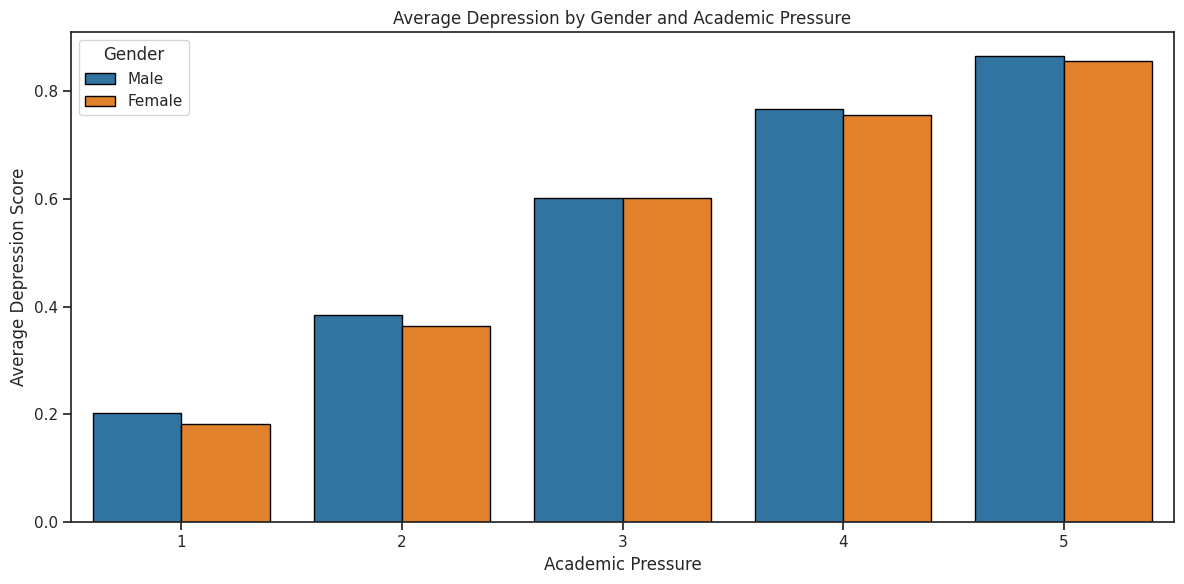

In [57]:
filtered_data = df.groupby(['Gender', 'Academic Pressure'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Academic Pressure',y = 'Depression',hue = 'Gender',palette = 'tab10',edgecolor = 'black')

plt.title('Average Depression by Gender and Academic Pressure')
plt.ylabel('Average Depression Score')
plt.xlabel('Academic Pressure')
plt.tight_layout()
plt.show()

I see the rate of depression gradually increasing as academic pressure gradually increases. Although the rates for men and women are close to each other, the rate for men is higher than for women.

### 4. Relationship Between Age, Academic Pressure and Depression

#### Purpose of Analysis:

I am doing this analysis to understand the effects of age and academic pressure on depression. How do people's ages vary with their levels of academic pressure, and how does this affect depression? I'm looking for answers to these questions.

***Columns to be used:***

* Age

* Academic Pressure

* Depression

***Statistics and Visualizations to be used:***

* correlation (age vs academic pressure)

* Scatter plot

In [58]:
from scipy.stats import pearsonr

corr,p_value = pearsonr(df["Age"],df["Academic Pressure"])

print("correlation:",corr)
print("p-value:",p_value)

correlation: -0.07700633812442356
p-value: 9.19294281514852e-38


Age has a slight effect on academic pressure, but this effect is quite weak. Academic pressure may decrease slightly as get older, but this relationship is quite minimal.

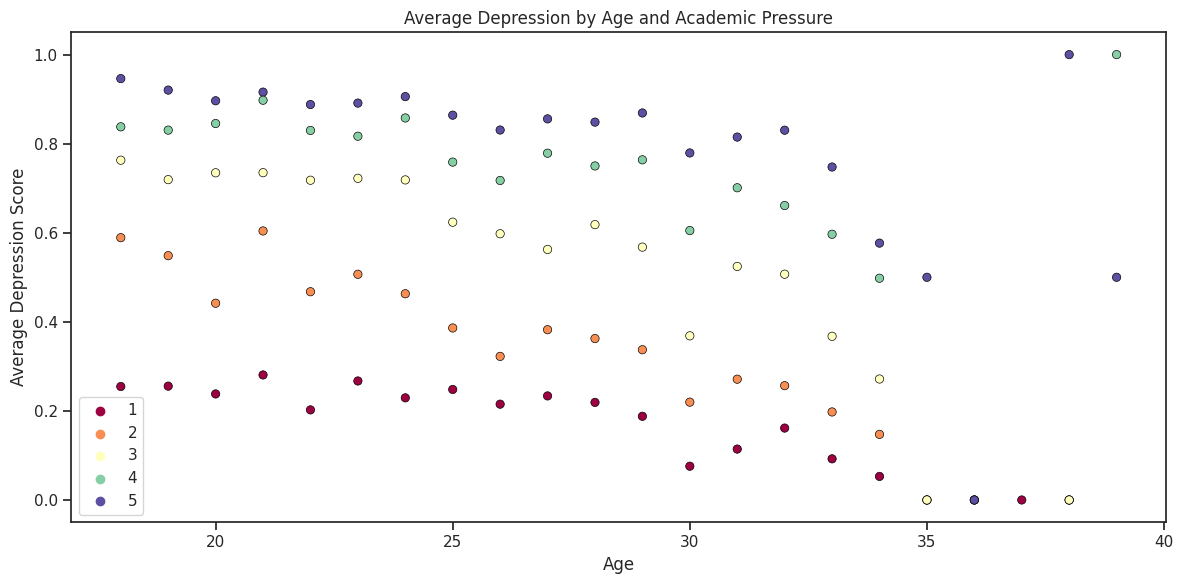

In [59]:
filtered_data = df.groupby(['Age', 'Academic Pressure'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,x = 'Age',y = 'Depression',hue = 'Academic Pressure',palette = 'Spectral',edgecolor = 'black')

plt.title('Average Depression by Age and Academic Pressure')
plt.ylabel('Average Depression Score')
plt.xlabel('Age')
plt.tight_layout()
plt.legend()
plt.show()

When I look at the graph, I notice that the depression scores change as age increases. At younger ages, especially those with higher levels of academic pressure, depression scores are quite high. However, as age increases and especially as academic pressure levels decrease, depression scores tend to decrease.

This suggests that academic pressure on young people can have a significant impact on their depression levels. As they get older and pressure levels decrease, depression scores also decrease. This gives us important information to understand the effects of academic pressure and age on mental health.

### 5. Relationship Between Gender, Dietary Habits and Depression


#### Purpose of the Analysis:
I am doing this analysis to understand the effects of dietary habits and gender on depression. How are depression levels affected as people's dietary habits change? How do dietary habits change in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender
* Dietary Habits
* Depression
  
***Statistics and Visualizations to be used:***

* t-test (depression vs dietary habits)
* Barplot

In [60]:
f_stat, p_val = perform_anova(df, group_col='Dietary Habits', target_col='Depression')

print("f-stat:",f_stat)
print("p-value:",p_val)

f-stat: 630.8978634039497
p-value: 1.1306823397005454e-268


These results are quite striking! So, according to the ANOVA analysis, there seems to be a really strong relationship between dietary habits and depression. The f-stat is so high and the p-value is incredibly low (almost zero). The fact that the p-value is so low suggests that eating habits significantly affect depression levels. That is, there are **significant differences** in depression levels between groups with different dietary habits.

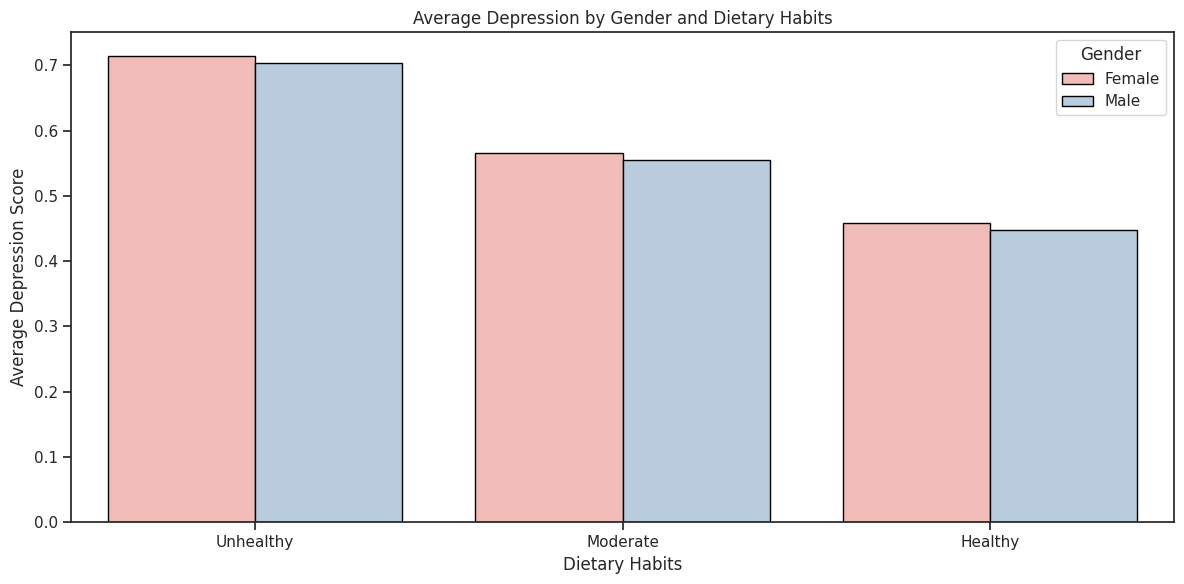

In [61]:
filtered_data = df.groupby(['Gender', 'Dietary Habits'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Dietary Habits',y = 'Depression',hue = 'Gender',palette = 'Pastel1',edgecolor = 'black')

plt.title('Average Depression by Gender and Dietary Habits')
plt.ylabel('Average Depression Score')
plt.xlabel('Dietary Habits')
plt.tight_layout()
plt.show()

Unhealthy: Both men and women have the highest depression scores. Women in particular have a slightly higher average depression score.

Moderate: Depression scores decrease for both genders, but again women have slightly higher depression scores than men.

Healthy: The lowest depression scores are seen with a healthy diet. But again, women have slightly higher depression scores than men.

These results suggest that dietary habits have a **significant impact** on depression levels. Unhealthy habits lead to the highest levels of depression, while healthy habits lead to the lowest levels. This is important data to show the potential impact of dietary habits on depression.

### 6. Relationship Between Gender, Study Satisfaction and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of course satisfaction and gender on depression. How are depression levels affected as people's course satisfaction changes? What are the levels of course satisfaction in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Study Satisfaction

* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs study satisfaction)

* Barplot

In [62]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Study Satisfaction')

print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: -28.41325838470347
p-value: 4.473909236046024e-175


These ANOVA test results are really striking. I am trying to understand the relationship between study satisfaction and depression, and these results provide important information.

The t-statistic is very high and negative. This shows that study satisfaction is inversely related to depression. In other words, it seems that **as study satisfaction increases, depression levels decrease**.

The p-value is incredibly low, so our results are **highly statistically significant**. This confirms that this relationship is not a coincidence.

This data shows that students' study satisfaction has a significant effect on their depression levels. In other words, students who are satisfied with their classes and studies tend to have lower levels of depression.

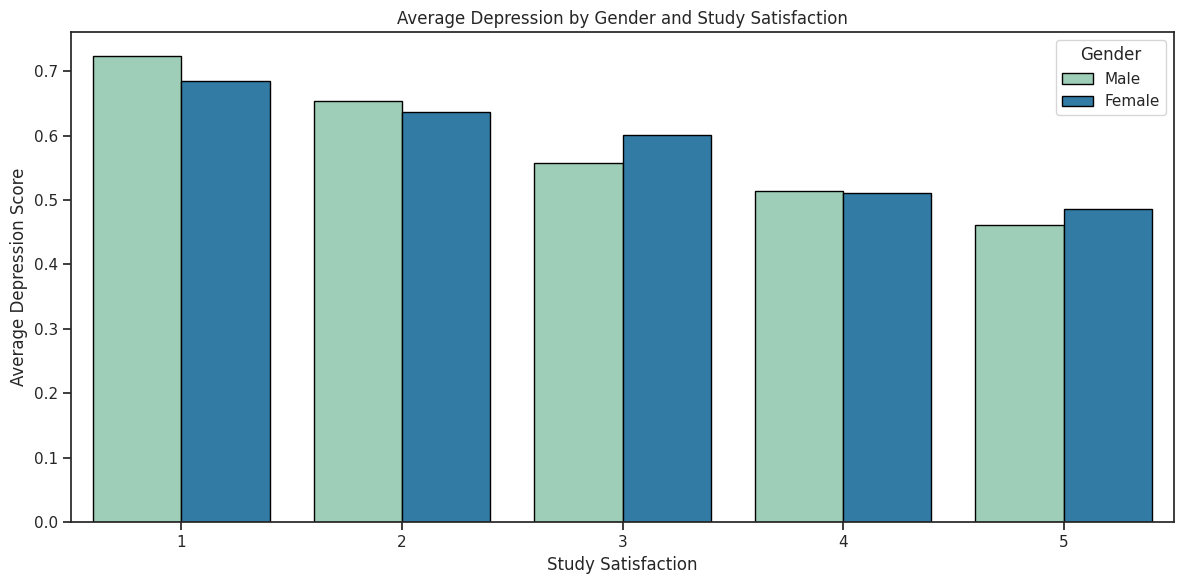

In [63]:
filtered_data = df.groupby(['Gender', 'Study Satisfaction'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Study Satisfaction',y = 'Depression',hue = 'Gender',palette = 'YlGnBu',edgecolor = 'black')

plt.title('Average Depression by Gender and Study Satisfaction')
plt.ylabel('Average Depression Score')
plt.xlabel('Study Satisfaction')
plt.tight_layout()
plt.show()

We can clearly see that as study satisfaction increases, average depression decreases gradually. 

### 7. Relationship Between Gender, Sleep Duration and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of sleep duration and gender on depression. How are depression levels affected as people's sleep duration changes? What are the sleep levels for different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Sleep Duration

* Depression

***Statistics and Visualizations to be used:***

* ANOVA (depression vs sleep duration)

* Barplot

In [64]:
f_stat, p_val = perform_anova(df, group_col='Sleep Duration', target_col='Depression')

print("f-stat:",f_stat)
print("p-value:",p_val)

f-stat: 92.95327096843886
p-value: 7.45985752024424e-60


The f-stat is very high and the p-value is almost zero. This shows that sleep duration has a very strong effect on depression levels.

The fact that the f-stat is so high indicates that there are big differences between the groups. That is, there are significant differences in depression levels between groups with different sleep duration. The fact that the p-value is so low confirms that these differences are **statistically significant**. In short, there is indeed a strong relationship between sleep duration and depression.

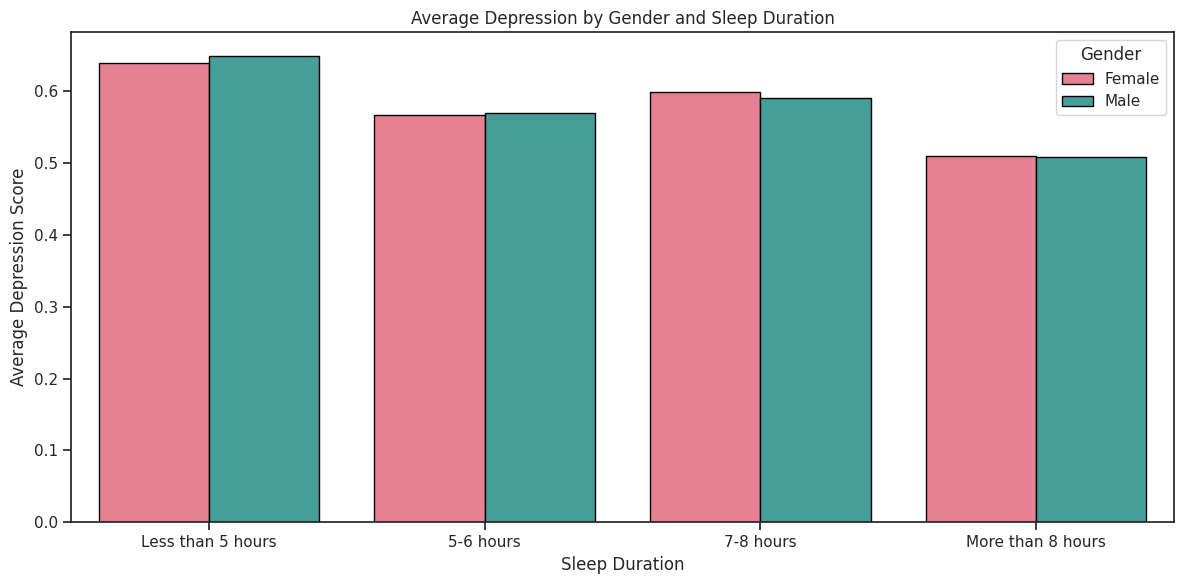

In [65]:
duration_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

filtered_data = df.groupby(['Gender', 'Sleep Duration'])['Depression'].mean().sort_values(ascending = False).reset_index()

filtered_data["Sleep Duration"] = pd.Categorical(filtered_data["Sleep Duration"],categories=duration_order, ordered=True)

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Sleep Duration',y = 'Depression',hue = 'Gender',hue_order=["Female","Male"],palette = 'husl',edgecolor = 'black')

plt.xticks(ticks=range(len(duration_order)), labels=duration_order)

plt.title('Average Depression by Gender and Sleep Duration')
plt.ylabel('Average Depression Score')
plt.xlabel('Sleep Duration')
plt.tight_layout()
plt.show()

What I saw in the graph is really interesting! I noticed that people who slept more than 8 hours had the lowest depression scores, while those who slept 7-8 hours had slightly higher scores. This suggests that sleeping more may reduce the risk of depression in some people. Here are the highlights:

Those who slept more than 8 hours had the lowest depression scores.
Those who slept 7-8 hours had slightly higher depression scores, but still within reasonable limits. This is a good result for people with average sleep patterns. Those who slept less (especially less than 5 hours) had significantly higher depression scores.

### 8. Relationship Between Gender, Financial Stress and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of financial stress and gender on depression. How are depression levels affected as people's levels of financial stress change? What are the levels of financial stress in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Financial Stress

* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs financial stress)

* Barplot

In [66]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Financial Stress')

print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 64.99243111220137
p-value: 0.0


These t-test results clearly show the impact of financial stress on depression. The t-statistic is very high and the p-value is 0.0, indicating that this relationship is **highly statistically significant.** In summary, the risk of depression is significantly increased in people who experience financial stress.

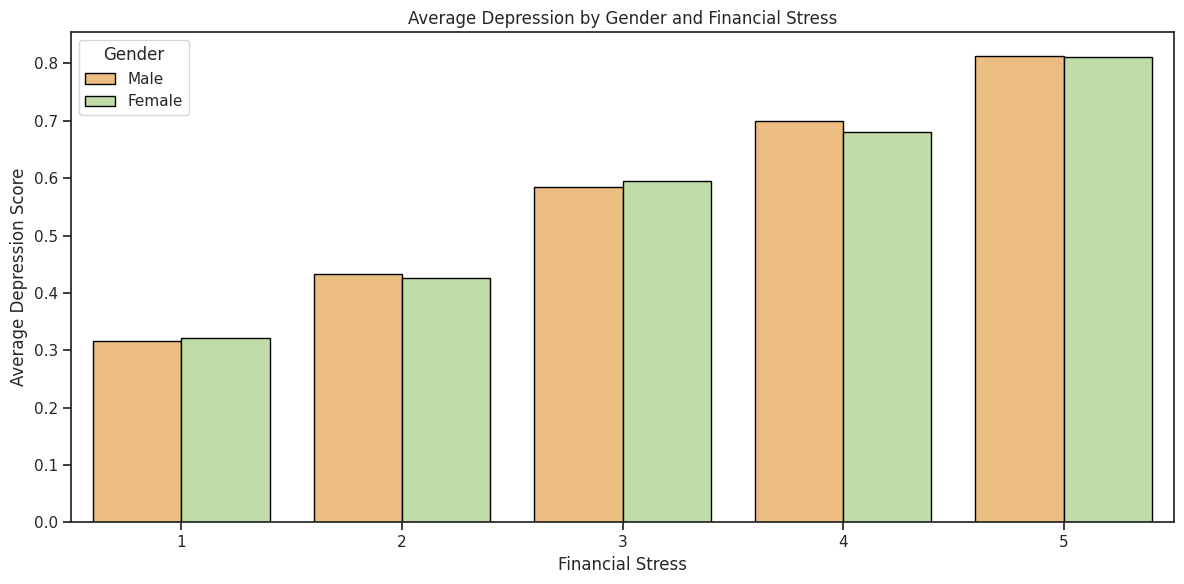

In [67]:
filtered_data = df.groupby(['Gender', 'Financial Stress'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Financial Stress',y = 'Depression',hue = 'Gender',palette = 'Spectral',edgecolor = 'black')

plt.title('Average Depression by Gender and Financial Stress')
plt.ylabel('Average Depression Score')
plt.xlabel('Financial Stress')
plt.tight_layout()
plt.show()

I see average depression gradually increasing as financial stress increases

### 9. Relationship Between Age, Financial Stress and Depression

#### Purpose of Analysis:

I am doing this analysis to understand the effects of age and financial stress on depression. How do people's ages vary with their levels of financial stress, and how does this affect depression? I'm looking for answers to these questions.

***Columns to be used:***

* Age

* Financial Stress

* Depression

***Statistics and Visualizations to be used:***

* correlation (age vs financial stress)

* Scatter plot

In [68]:
corr,p_value = pearsonr(df["Age"],df["Financial Stress"])

print("correlation:",corr)
print("p-value:",p_value)

correlation: -0.09704330129916963
p-value: 4.939137815770706e-59


Age has a slight effect on financial stress. Financial stress decreases slightly as get older, but this relationship is quite minimal. 

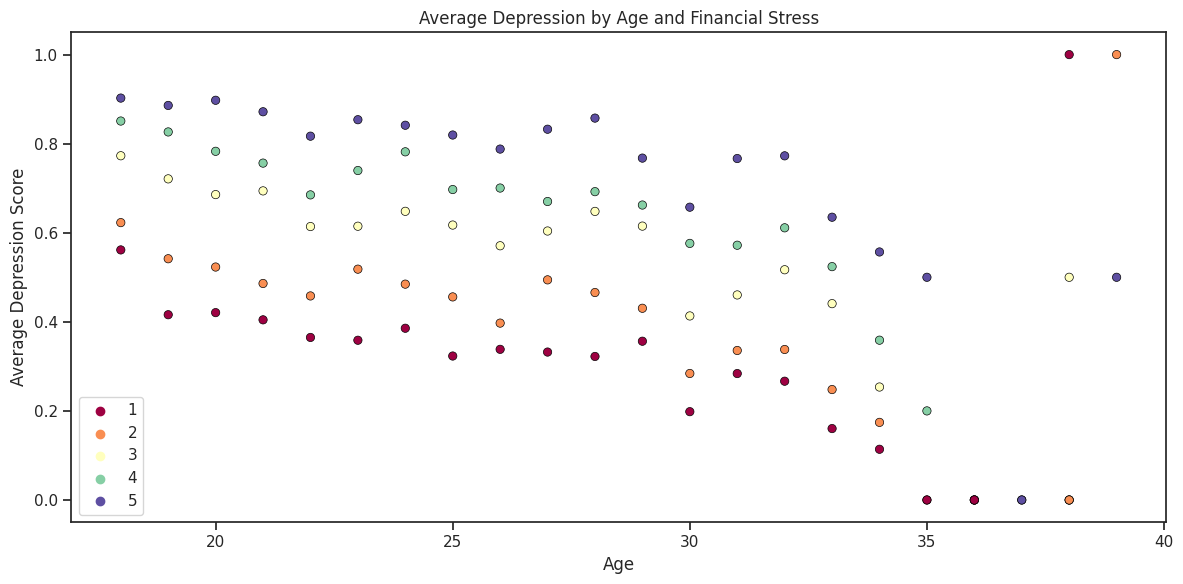

In [69]:
filtered_data = df.groupby(['Age', 'Financial Stress'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,x = 'Age',y = 'Depression',hue = 'Financial Stress',palette = 'Spectral',edgecolor = 'black')

plt.title('Average Depression by Age and Financial Stress')
plt.ylabel('Average Depression Score')
plt.xlabel('Age')
plt.tight_layout()
plt.legend()
plt.show()

When I look at the graph, I notice that depression scores generally decrease with increasing age. Higher levels of financial stress, especially at younger ages, are associated with higher depression scores. However, as get older, depression scores tend to decrease, even if the level of financial stress remains the same.

### 10. Relationship Between Gender, Family Mental History and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of family history of mental illness and gender on depression. How are people's levels of depression affected as their family history of mental illness changes? What is the family history of mental illness in different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Family Mental History

* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs family mental history)

* Barplot

In [70]:
f_stat, p_val = perform_anova(df, group_col='Family Mental History', target_col='Depression')

print("f-statistic:",f_stat)
print("p-value:",p_val)

f-statistic: 79.50149750345471
p-value: 5.107741019964576e-19



The f-statistic is very high. This means that individuals with a family history of mental health problems have significantly different depression scores than those without. The p-value is incredibly low, indicating that the results are **highly statistically significant.** In other words, this relationship is no coincidence.

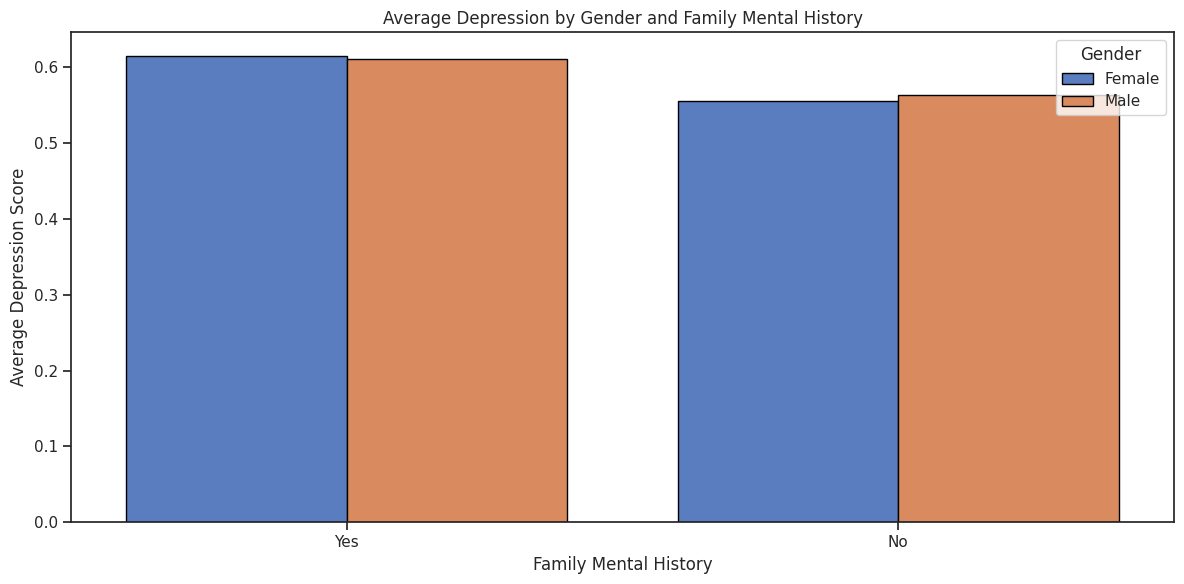

In [71]:
filtered_data = df.groupby(['Gender', 'Family Mental History'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Family Mental History',y = 'Depression',hue = 'Gender',palette = 'muted',edgecolor = 'black')

plt.title('Average Depression by Gender and Family Mental History')
plt.ylabel('Average Depression Score')
plt.xlabel('Family Mental History')
plt.tight_layout()
plt.show()

This graph shows very clearly that people with a family history of mental health problems are at higher risk of depression.

### 11. Relationship Between Gender, Work/Study Hours and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of work/study hours and gender on depression. How do people's levels of depression change as their work/study hours change? What are the work/study hours for different genders? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* Work/Study Hours

* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs work/study hours)

* Barplot

In [72]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Work/Study Hours')

print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 35.58996604512945
p-value: 2.5458842862148483e-271


These data show that long working or studying hours have a major impact on depression levels. Long working/studying hours can significantly increase people's risk of depression.

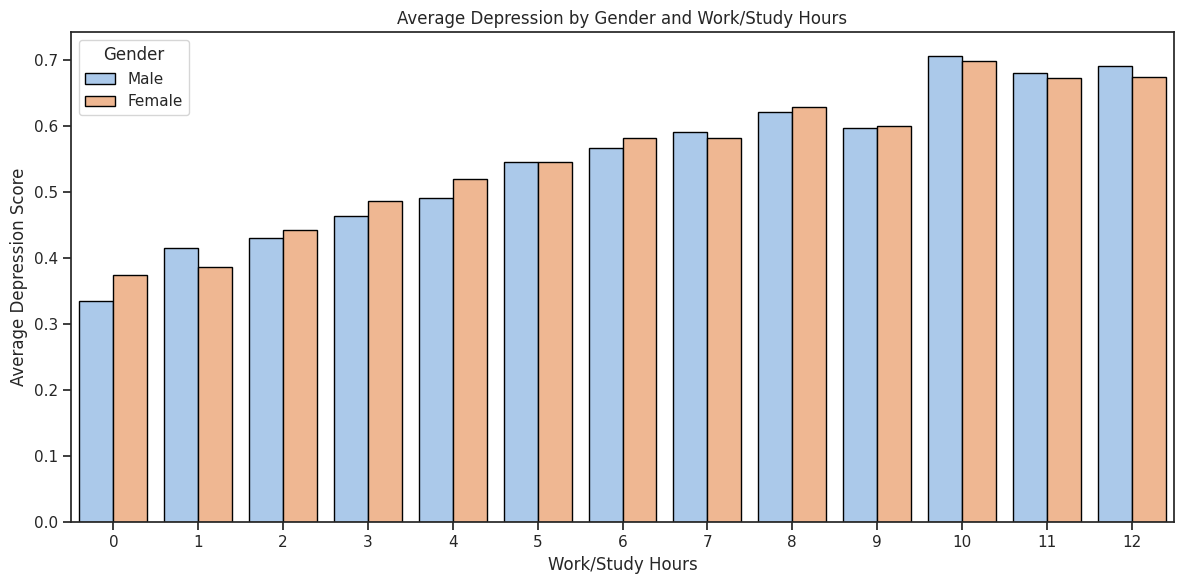

In [73]:
filtered_data = df.groupby(['Gender', 'Work/Study Hours'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'Work/Study Hours',y = 'Depression',hue = 'Gender',palette = 'pastel',edgecolor = 'black')

plt.title('Average Depression by Gender and Work/Study Hours')
plt.ylabel('Average Depression Score')
plt.xlabel('Work/Study Hours')
plt.tight_layout()
plt.show()

As work/study hours increase, depression scores increase for both men and women. Depression scores for men and women are quite similar, but slightly higher for women. Depression scores are particularly high for people who work or study for more than 9 hours.This graph shows that working or studying long hours has a big impact on depression, and that this effect is true for both genders.

### 12. Relationship Between Degree, Profession and Depression

#### Purpose of Analysis:

I am doing this analysis to understand the effects of degree and profession on depression. How do people's degree levels vary depending on their profession? What impact does degree have on depression? I'm looking for answers to these questions.

***Columns to be used:***

* Degree

* Profession

* Depression

***Statistics and Visualizations to be used:***

* ANOVA (depression vs degree)

* Barplot

In [74]:
f_stat, p_val = perform_anova(df, group_col='Degree', target_col='Depression')

print("f-statistic:",f_stat)
print("p-value:",p_val)

f-statistic: 20.9303158819356
p-value: 2.710628662229018e-97


Degree levels have a significant effect on depression, but this effect is lower than for some other factors. There are **significant differences** in depression levels between individuals with different degrees.

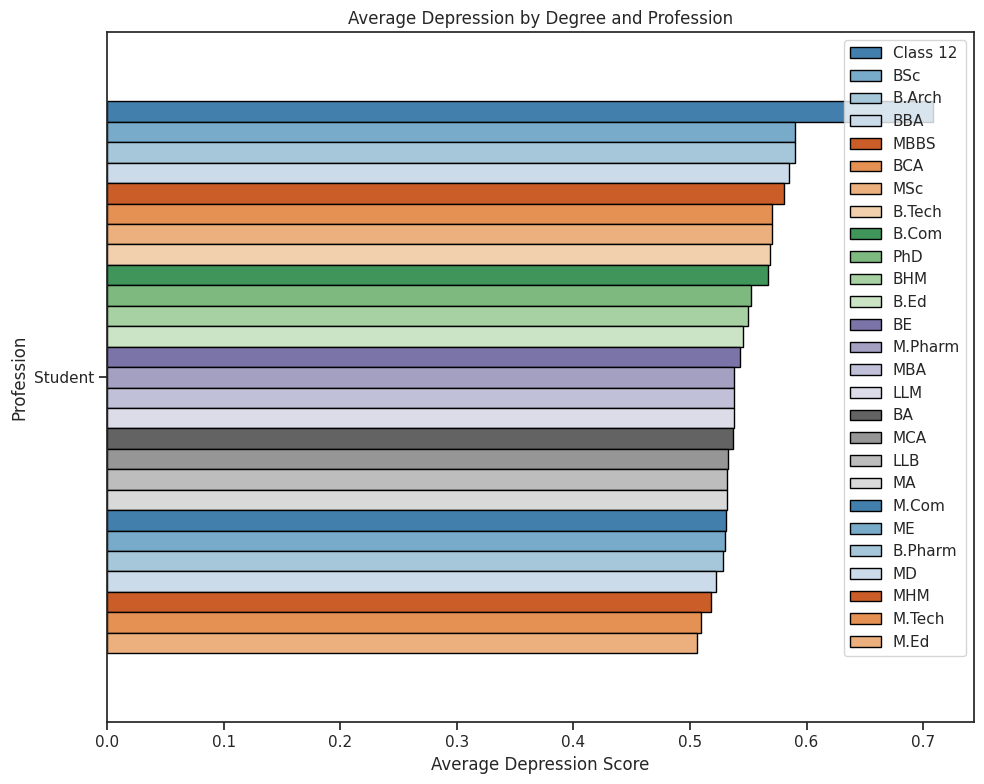

In [75]:
filtered_data = df.groupby(['Degree', 'Profession'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (10, 8))
sns.barplot(filtered_data,y = 'Profession',x = 'Depression',hue = 'Degree',palette = 'tab20c',edgecolor = 'black')

plt.title('Average Depression by Degree and Profession')
plt.xlabel('Average Depression Score')
plt.ylabel('Profession')
plt.tight_layout()
plt.legend()
plt.show()

This graph made me think about how different professions and academic levels affect depression scores. The first thing that caught my attention was that Class 12, i.e. high school seniors, had the highest depression scores. Some professions, such as engineering or architecture, rank high in terms of depression levels. On the other hand, there are groups with lower depression scores.

### 13. Relationship Between Cgpa, Academic Pressure and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of CGPA (Cumulative Grade Point Average) and academic pressure on depression. How do people's CGPAs vary depending on their level of academic pressure? How does CGPA relate to depression?  I'm looking for answers to these questions.

***Columns to be used:***

* CGPA 

* Academic Pressure

* Depression

***Statistics and Visualizations to be used:***

* t-test (depression vs CGPA) and correlation (academic pressure vs cgpa)

* Scatter plot

In [76]:
corr,p_value = pearsonr(df["Academic Pressure"],df["Cgpa"])

print("correlation:",corr)
print("p-value:",p_value)

correlation: -0.02537544599891545
p-value: 2.3674054266333784e-05


The Correlation coefficient is quite low and negative. This shows that academic pressure has almost no effect on CGPA, and even if it does, it has a very small negative effect. So, I would say that CGPA tends to decrease slightly as academic pressure increases, but this effect is very weak.The fact that the p-value is very low indicates that this result is statistically significant. In other words, this low correlation coefficient is not coincidental.

**In summary, academic pressure does not seem to have a huge impact on CGPA.**

In [77]:
t_stat, p_val = perform_ttest(df, group_col='Depression', target_col='Cgpa')

print("t-statistic:",t_stat)
print("p-value:",p_val)

t-statistic: 3.5542498608234276
p-value: 0.0003796886500073618


These t-test results show that there is a significant relationship between CGPA and depression. The t-statistic is positive and the p-value is quite low, which means that this relationship is statistically significant. But the value of the t-statistic is not as high as the other variables. So I can say that cgpa affects depression minimally.

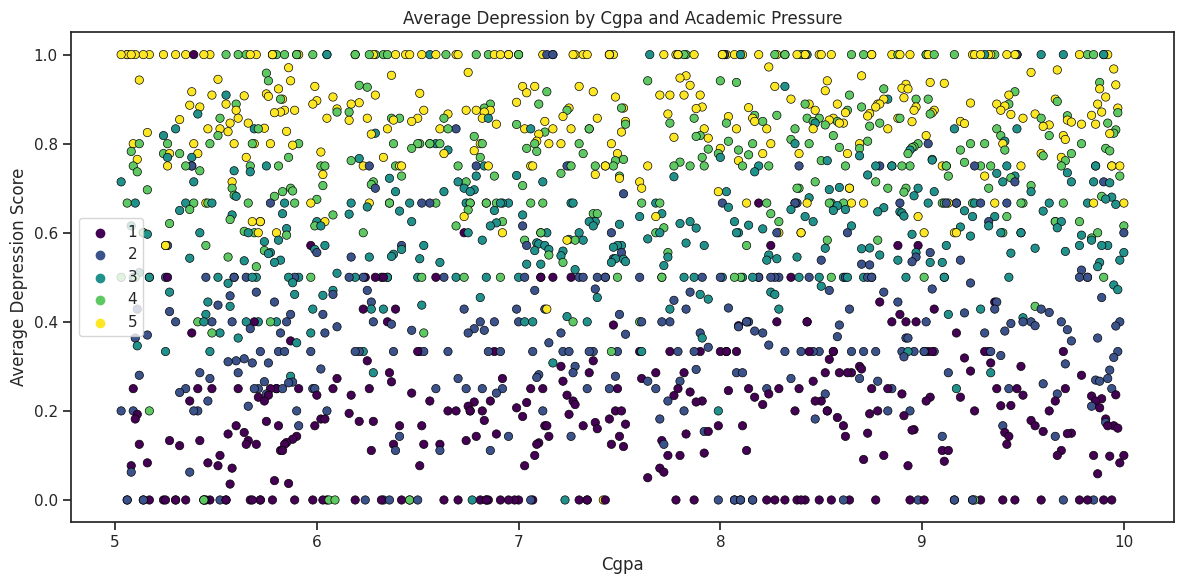

In [78]:
filtered_data = df.groupby(['Cgpa', 'Academic Pressure'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.scatterplot(filtered_data,x = 'Cgpa',y = 'Depression',hue = 'Academic Pressure',palette = 'viridis',edgecolor = 'black')

plt.title('Average Depression by Cgpa and Academic Pressure')
plt.ylabel('Average Depression Score')
plt.xlabel('Cgpa')
plt.tight_layout()
plt.legend()
plt.show()

The first thing I notice in the graph is that as the level of academic pressure increases, depression scores tend to increase. At the lowest levels of pressure (1), depression scores are generally lower. However, as the pressure level increases (5), depression scores rise significantly.

Also, there does not seem to be a very strong relationship between CGPA and depression scores. This suggests that academic achievement does not have a big impact on depression, but academic pressure may be an important factor. In other words, getting high grades does not reduce depression, but academic pressure can significantly increase depression.

### 14. The Relationship between Gender, City and Depression

#### Purpose of the Analysis:

I am doing this analysis to understand the effects of city of residence and gender on depression. How do people's levels of depression change as their city of residence changes? What is the gender distribution in different cities? I am looking for answers to these questions.

***Columns to be used:***

* Gender

* City

* Depression

***Statistics and Visualizations to be used:***

* ANOVA (depression vs city)

* Barplot

In [79]:
f_stat, p_val = perform_anova(df, group_col='City', target_col='Depression')

print("f-statistic:",f_stat)
print("p-value:",p_val)

f-statistic: 5.6764929501911165
p-value: 7.931684020160997e-21


Cities have a significant impact on depression, but not as strong as other factors. The environment we live in can affect our mental health, but there are other factors that have a more significant impact on depression.

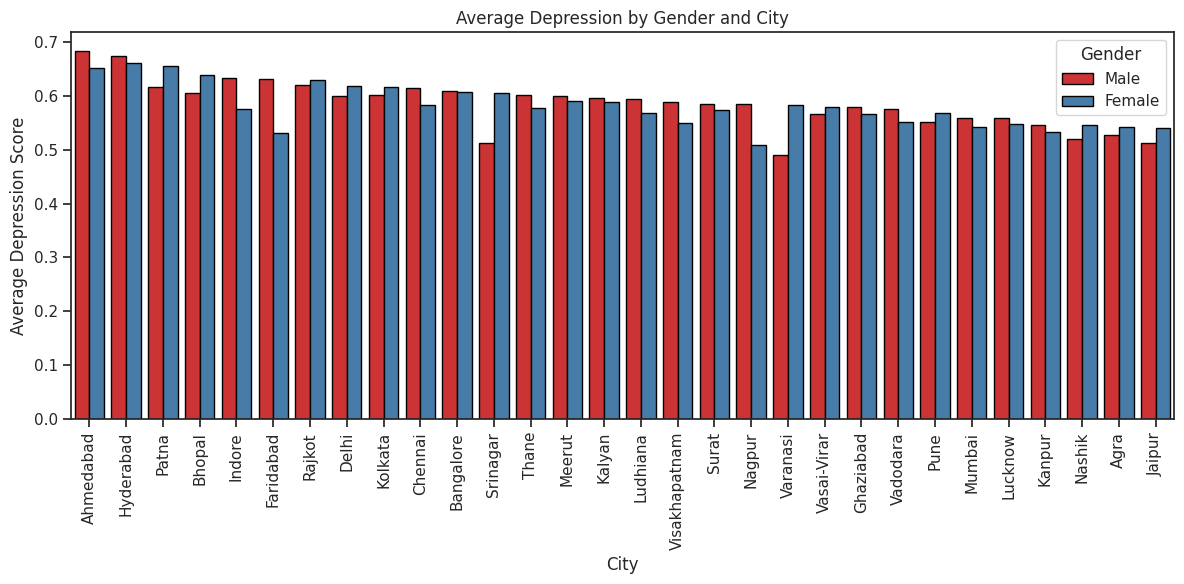

In [80]:
filtered_data = df.groupby(['Gender', 'City'])['Depression'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize = (12, 6))
sns.barplot(filtered_data,x = 'City',y = 'Depression',hue = 'Gender',palette = 'Set1',edgecolor = 'black')

plt.title('Average Depression by Gender and City')
plt.ylabel('Average Depression Score')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

This graph helps us understand the differences in depression levels between men and women living in different cities. The living conditions, social environment and stress levels offered by cities can have an impact on depression. However, looking at this graph, I see that the impact of cities on depression is not as strong as other factors.

### 15. Relationship Between Academic Pressure and Suicidal Thoughts

#### Purpose of Analysis:
I conduct this analysis to understand the effects of academic pressure and suicidal thoughts on depression.

***Columns to be used:***

* Academic Pressure

* Suicidal Thoughts

***Statistics and Visualizations to be used:***

* ANOVA (academic pressure vs suicidal thoughts)

* Stacked barplot

In [81]:
f_stat, p_val = perform_anova(df, group_col='Suicidal Thoughts', target_col='Academic Pressure')

print("f-statistic:",f_stat)
print("p-value:",p_val)

f-statistic: 2056.8490572368996
p-value: 0.0


Academic pressure has a very strong effect on suicidal thoughts. This shows that academic pressure on students can have serious consequences for mental health.

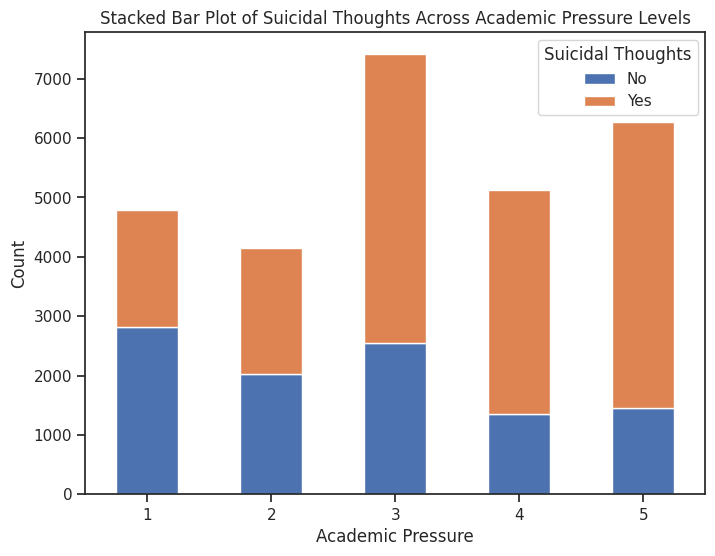

In [82]:
academic_groups = df.groupby(['Academic Pressure', 'Suicidal Thoughts']).size().unstack()

academic_groups.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Suicidal Thoughts Across Academic Pressure Levels')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.legend(title='Suicidal Thoughts')
plt.xticks(rotation=0)
plt.show()

Looking at the graph, I can see that as the level of academic pressure increases, the number of people with suicidal thoughts also increases. Especially at levels 3 and 5, I notice that the number of people with suicidal thoughts is quite high. This makes me think that high academic pressure may increase suicidal thoughts.

### 16. Correlation Heatmap

I use the correlation matrix to examine how all the variables used in the analysis relate to each other. This way I can determine which variables are more strongly related to each other.

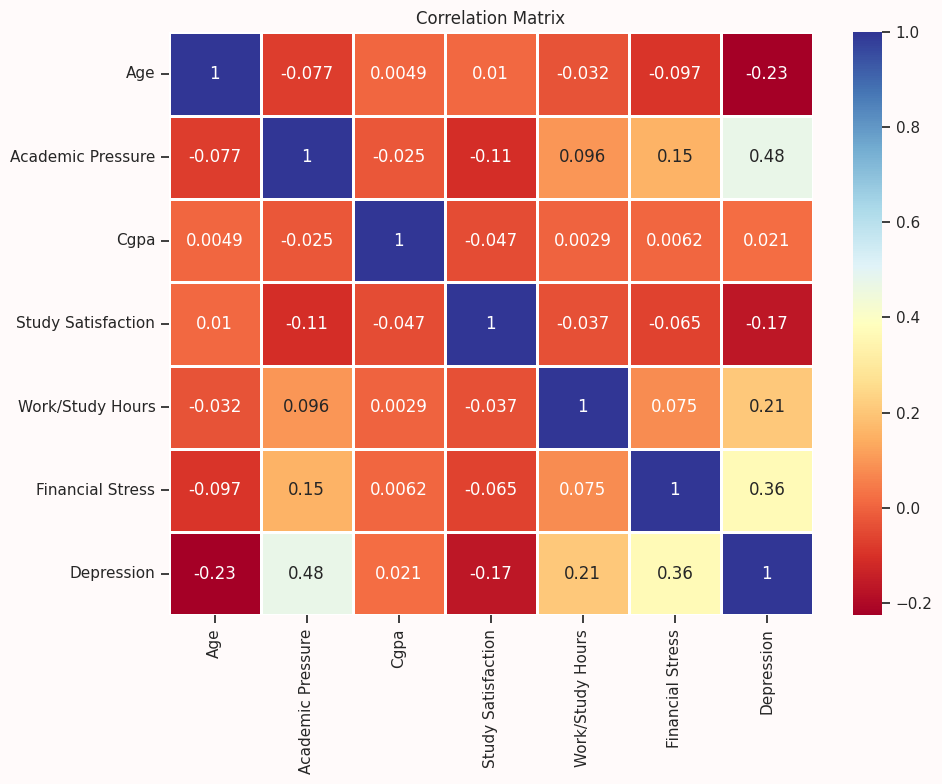

In [83]:
corr_mat = df.select_dtypes(include = np.number)

plt.figure(figsize = (10, 8), facecolor = 'snow')
sns.heatmap(corr_mat.corr(),\
           annot = True,\
           cbar = True,\
           cmap = 'RdYlBu',\
           linewidths = 2)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Features Engineering

## 1. Feature Transformation

**Reason for Using Label Encoder:** I use Label Encoder to convert categorical data into numeric values. This transformation is necessary for machine learning models and various analyses. Machine learning algorithms can achieve more efficient and effective results when working with numerical data. Therefore, I aim to increase the performance of the model and improve the analysis process by converting categorical data into numerical values

In [84]:
from sklearn.preprocessing import LabelEncoder

# I did not convert the city, degree and profession columns because,
# when I examined the statistics in the eda section, I saw that they were not related to depression.

label_encode = ["Gender","Dietary Habits","Sleep Duration","Suicidal Thoughts","Family Mental History"]

label_encoder = LabelEncoder()

for col in label_encode:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Gender,Age,City,Profession,Academic Pressure,Cgpa,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental History,Depression
0,1,33,Visakhapatnam,Student,5,8.97,2,0,0,B.Pharm,1,3,1,0,1
1,0,24,Bangalore,Student,2,5.90,5,0,1,BSc,0,3,2,1,0
2,1,31,Srinagar,Student,3,7.03,5,2,0,BA,0,9,1,1,0
3,0,28,Varanasi,Student,3,5.59,2,1,1,BCA,1,4,5,1,1
4,0,25,Jaipur,Student,4,8.13,3,0,1,M.Tech,1,1,1,0,0


Since I converted some categorical variables to numeric values, I just want to look again at the correlation coefficients for depression

In [85]:
corr_mat = df.select_dtypes(include=np.number)

corr_mat.corr()['Depression'].to_frame().reset_index().rename(columns = {'index': 'features', 'Depression': 'corr'})\
.sort_values(by = 'corr', ascending = False)

,features,corr
11,Depression,1.000000
7,Suicidal Thoughts,0.547568
2,Academic Pressure,0.475256
9,Financial Stress,0.363517
8,Work/Study Hours,0.208964
6,Dietary Habits,0.207638
10,Family Mental History,0.053457
3,Cgpa,0.021335
0,Gender,0.001386
5,Sleep Duration,-0.022336


In [86]:
df.shape

(27743, 15)

**Why don't I Use Dimension Reduction Techniques (like LDA and PCA) ?**

The reason I don't used dimensionality reduction techniques in this analysis was because the dataset was small. We only have 15 features, so the dataset is not very complex. I did not see a need to remove unnecessary features or represent the data in a lower dimensionality in such a small dataset.

Also, there were no highly correlated features in the data. When I examined the correlation matrix, there was only a slightly higher correlation between "Depression" and "Suicidal Thoughts", but I did not observe any strong correlations between the other features. This means that it would be unnecessary to use dimensionality reduction techniques.

In short, since the dataset was small and there were no rich correlations between the features, I found it unnecessary to use dimensionality reduction techniques.

## 2. Feature Selection

I use train-test-split before starting feature importance because I want to objectively evaluate the performance of my model. This allows me to see how my model reacts to new data when determining feature importance and reduces the risk of over-fitting.

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop(["Depression","City","Degree","Profession"], axis = 1)
y = df["Depression"]

X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_ftrain.shape, X_ftest.shape, y_ftrain.shape, y_ftest.shape

((22194, 11), (5549, 11), (22194,), (5549,))

I will use 2 algorithms for model selection. One is **mutual information classifier** and the other is **gradient boosting classifier.**

* Mutual Information evaluates direct information sharing as a model-independent method.

* Gradient Boosting analyzes complex interactions and relationships as a model-based method.

### 1. Feature Importance with Mutual Info Classifier

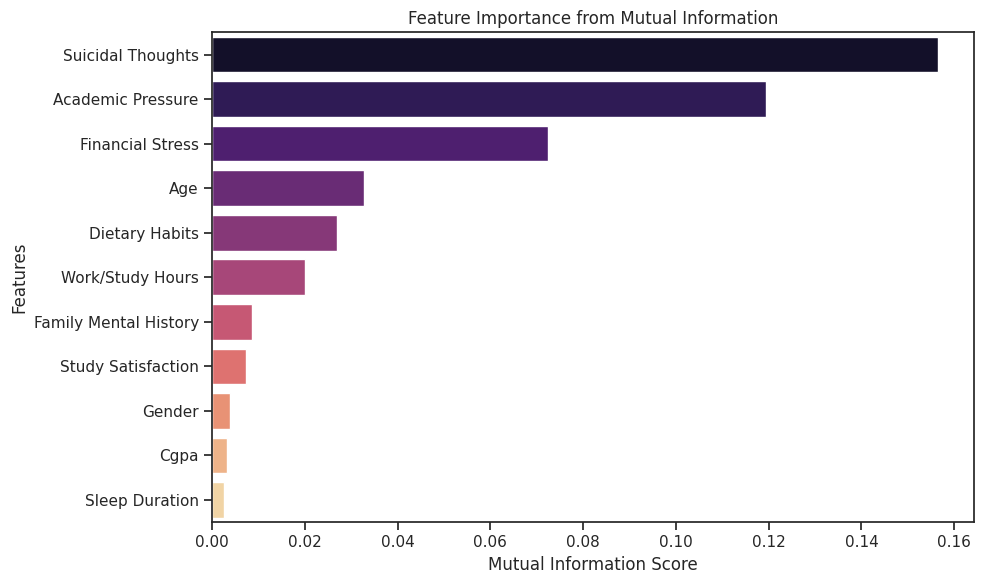

In [88]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_ftrain,y_ftrain,random_state=42)
mi_scores = pd.Series(mi_scores,index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores.values,y=mi_scores.index,palette="magma")
plt.title("Feature Importance from Mutual Information")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In this graph, I see that “Suicidal Thoughts” and “Academic Pressure” have the highest importance ratings, suggesting that these factors are critical in predicting depression. The other features are also listed in order of importance, but “Suicidal Thoughts” has the highest score. This indicates that this feature has the highest information link to the target variable. It may be useful to focus on these important features to improve model performance.

### 2. Feature Importance with Gradient Boosting Classifier

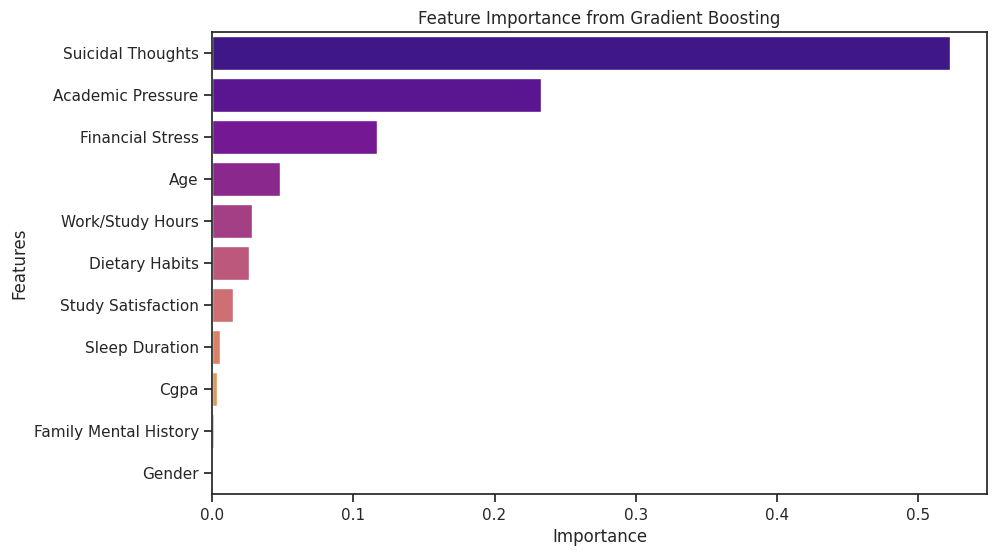

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_ftrain,y_ftrain)

feature_names = X.columns
gb_importances = gb_model.feature_importances_

gb_df = pd.DataFrame({"Features":feature_names,"Importance":gb_importances}).\
sort_values(by="Importance",ascending=False).reset_index(drop="first")


plt.figure(figsize=(10,6))

sns.barplot(x="Importance",y="Features",data=gb_df,palette="plasma")
plt.title("Feature Importance from Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

According to this graph, “Suicidal Thoughts” and “Academic Pressure” stand out as the features with the highest importance. This shows that the Gradient Boosting model gives more weight to these factors in predicting depression. Other characteristics are also ranked in order of importance, but with less impact. In particular, “Gender” appears to be the least important. This analysis can be useful to understand which factors the model focuses on more and helps us identify the features that are critical in predicting depression.

### General Overview:

#### Important Features:
Suicidal Thoughts, Academic Pressure and Financial Stress have the strongest effect on depression.
Age and Cgpa are also influential, but less so than the others.

#### Insignificant Characteristics:
Sleep Duration, Gender and Family Mental History have a low effect on depression.

# Modelling

Since my target variable (depression) is such a binary value, I only used **classification models.**
So I tried classification models like **Logistic Regression, Random Forest, KNN, SVC**, but I also used probabilistic models like **GaussianNB** and even boosting algorithms **(Gradient Boosting, AdaBoost, XGBoost)** because I wanted to see how different algorithms interpreted the data.

In [90]:
# train-test split

features = df.drop(['Depression', 'Gender', 'Sleep Duration', 'Family Mental History',"City","Degree","Profession"],axis=1)
target = df["Depression"]

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22194, 8), (5549, 8), (22194,), (5549,))

In this code, I prepare the data to predict depression. First, I remove some columns that I don't want to include in the modeling along with my target variable “Depression”. The remaining columns become predictors, i.e. features that will help me make predictions.

Then, I split these features (predictors) and the target variable (Depression) into training and test data. 80% of the data is split into a training set for the model to learn and 20% is split into a test set to test the accuracy of the model.

Finally, I verify that everything is split correctly by checking the shapes.

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In this code, I scale my training and test data because the different features (columns) need to be compatible with each other.

I standardize the data using StandardScaler, which transforms the mean of each column to 0 and the standard deviation to 1.

First I scale the training set with fit_transform, because the model should only use the training data when learning. Then I transform the test set to the same scale so that I can compare the results correctly.

In [92]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def print_metrics(model_name, y_train, pred_train, y_test, pred_test):
    
    print(f'--- Metrics for {model_name} ---\n')
    print(f'Training Accuracy: {accuracy_score(y_train, pred_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, pred_test)}\n')

    print(f'Training Recall: {recall_score(y_train, pred_train)}')
    print(f'Testing Recall: {recall_score(y_test, pred_test)}\n')

    print(f'Training Precision: {precision_score(y_train, pred_train)}')
    print(f'Testing Precision: {precision_score(y_test, pred_test)}\n')

    print(f'Training F1score: {f1_score(y_train, pred_train)}')
    print(f'Testing F1score: {f1_score(y_test, pred_test)}')

Here I create the function that calculates the metrics values for the models

## 1. Logistic Regression Model

The reason I chose Logistic Regression is that my problem is a binary classification problem. My target variable, Depression, takes only two values: 0 (no depression) and 1 (depression). This is an area where Logistic Regression is strong.

Another reason why I use this model is that it assumes a linear relationship between the dependent variable and the independent variables and can explain this relationship with probability estimates. Also, the results of Logistic Regression are quite easy to interpret. Especially in a sensitive topic like depression, it was important for me to understand how much weight the model gave to which variables. Therefore, Logistic Regression was an ideal choice for my first experiment.

In [93]:
# create the model, train it and make predictions

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [94]:
print_metrics("Logistic Regression", y_train, pred_train, y_test, pred_test)

--- Metrics for Logistic Regression ---

Training Accuracy: 0.846760385689826
Testing Accuracy: 0.8442962695981258

Training Recall: 0.8867169462828998
Testing Recall: 0.8795811518324608

Training Precision: 0.8565905880603673
Testing Precision: 0.8579152898768398

Training F1score: 0.8713934581206276
Testing F1score: 0.8686131386861314


The model’s metrics show that the dataset performs with an overall accuracy of 84% (which seems low to me) and that the training-testing performances are consistent. The closeness of the Training and Testing accuracies suggests that there is no over-fitting. The Precision and Recall values show that the model can both make correct classifications and adequately capture positive classes.

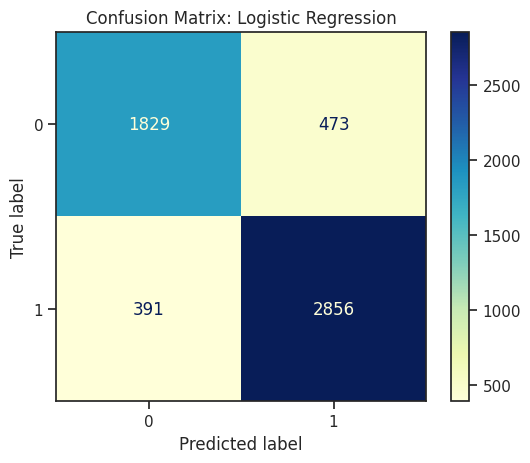

In [95]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test,pred_test)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=lr.classes_)
disp_lr.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

When the performance of the model is carefully examined according to the confusion matrix, 1829 true negative predictions and 473 false positive predictions were made for class 0. There are 2856 true positive predictions and 391 false negative predictions for class 1.

Although this table shows that the overall accuracy rate of the model is good, it reveals that more false positives were made for class 0 and fewer true positives were made for class 1. If the distribution between classes is unbalanced, the model may have difficulty compensating for this imbalance. This may indicate that it does not represent class 0 well enough. At this stage, a balancing method such as SMOTEENN can be applied to improve the distribution between classes.

In [96]:
df["Depression"].value_counts(normalize=True).to_frame()

,proportion
Depression,
1,0.585409
0,0.414591


When I look at the data, I notice that the number of examples of class 1 (58.54%) is higher than that of class 0 (41.46%). This suggests that the model is more prone to learning class 1 and may neglect class 0. In fact, I can see in the confusion matrix that the model makes more errors when predicting class 0.

This imbalance creates problems in terms of evaluating the model fairly. Therefore, I plan to increase the number of classes 0 and provide balance between classes using SMOTEENN. In this way, the model can learn both classes equally and show a more balanced performance in predictions.

### Implementing SMOTEEEN

SMOTEENN is a data sampling method used to solve data imbalance. This method consists of two stages:

**SMOTE (Synthetic Minority Oversampling Technique):** In the first stage, synthetic samples are added to the minority class. This aims to eliminate the class imbalance by bringing the size of the minority class in the dataset closer to the majority class. This process creates new samples by utilising similarities between existing data points belonging to the minority class.

**ENN (Edited Nearest Neighbours):** In the second stage, noisy or misclassified data points are cleaned. ENN evaluates the nearest neighbours for each data point and removes data points from the dataset whose class is incorrectly defined by the majority. This process reduces errors in the dataset and improves the accuracy of the model.

Combining these two methods not only removes data imbalance but also makes the dataset cleaner and more suitable for learning. SMOTEENN is particularly effective on datasets with unbalanced class distributions and helps to achieve a balanced model performance across classes. I use it in my own analysis to get a more balanced depression.

Since the model had a high rate of incorrect predictions in class 0 due to imbalanced data, I will apply SMOTEENN and retrain my Logistic Regression model after this process.

In [97]:
# implementing smoteenn

from imblearn.combine import SMOTEENN 

features = df.drop(['City', 'Profession', 'Degree', 'Depression'], axis = 1)
target = df['Depression']

smote_enn = SMOTEENN(random_state=42, n_jobs=-1)
X_smote,y_smote = smote_enn.fit_resample(features,target)

print(f'Resampled dataset shape:')
y_smote.value_counts(normalize = True).to_frame()

Resampled dataset shape:


,proportion
Depression,
0,0.525294
1,0.474706


First of all, the SMOTEEN application largely eliminated the imbalance in the data. Initially, there was a significant imbalance in the Depression class: Depression 1 had a high rate, while Depression 0 had a lower rate. Thanks to the SMOTEEN application, I made the classes more balanced by increasing the number of examples of class 0. This process allowed my model to learn both classes better and increased the reliability of the analysis results.

In [98]:
df_2 = pd.concat([X_smote, y_smote], axis = 1)
df_2.shape

(19787, 12)

In [99]:
df_2.head()

,Gender,Age,Academic Pressure,Cgpa,Study Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental History,Depression
0,0,24,2,5.90,5,0,1,0,3,2,1,0
1,1,31,3,7.03,5,2,0,0,9,1,1,0
2,0,25,4,8.13,3,0,1,1,1,1,0,0
3,1,29,2,5.70,3,2,0,0,4,1,0,0
4,1,30,3,9.54,4,1,0,0,1,2,0,0


In [100]:
# train-test split on new df

features = df_2.drop(['Depression', 'Gender', 'Sleep Duration', 'Family Mental History'],axis=1)
target = df_2["Depression"]

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15829, 8), (3958, 8), (15829,), (3958,))

In [101]:
# re-standardization process

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Recreating the Logistic Regression Model

In [102]:
# recreate the model, train it and make predictions

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [103]:
print_metrics("Logistic Regression", y_train, pred_train, y_test, pred_test)

--- Metrics for Logistic Regression ---

Training Accuracy: 0.9656958746604334
Testing Accuracy: 0.9669024759979787

Training Recall: 0.9678063057070639
Testing Recall: 0.9658848614072495

Training Precision: 0.9602692713833157
Testing Precision: 0.9643427354976051

Training F1score: 0.9640230570463129
Testing F1score: 0.9651131824234354


Before SMOTEEN application, the model's accuracy and other metrics were lower. Training accuracy was around 84.68%, test accuracy was around 84.43%. After SMOTEEN application, training accuracy increased to 96.57%, test accuracy increased to 96.69%.

Significant improvements were also seen in recall, precision and F1 score metrics. With SMOTEEN application, the imbalance was eliminated, and the model's performance and accuracy were significantly increased. In this way, the analysis results became more reliable and balanced.

This shows that the method I applied was successful

In [104]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(estimator = lr,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of Logistic Regression: {lr_cv.mean()}')

CV Mean of Logistic Regression: 0.9653167192095318


The reason I use cross-validation is to be able to more reliably assess the overall performance of the model. Instead of a single test/train split on the training data, I split the data into multiple splits, training and testing on each. This allows me to see how the model responds to different subsets and variations of the data. As a result, I get a more robust and generalizable performance assessment. It also reduces the risk of overfitting and allows me to better monitor the model’s performance on the test set.

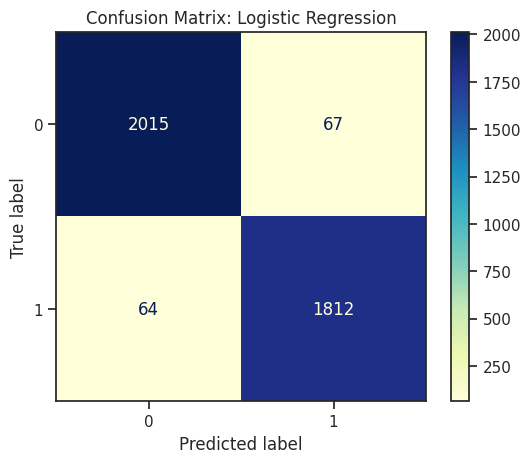

In [105]:
cm_lr = confusion_matrix(y_test,pred_test)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=lr.classes_)
disp_lr.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

I was really happy to see the improvement in the performance of my model after the SMOTEEN application. Confusion matrix results show that the model's true negative and true positive rates increased and the error rate decreased. This shows that the model can better distinguish between classes and make more accurate predictions. I think that thanks to this process, my analysis results became more reliable and balanced. These improvements helped my model learn both classes more balancedly and increased its overall performance. These results show that I am on the right track.

## 2. K-Neighbors Classifier

I use KNN in this analysis because the model is simple and straightforward. Since KNN classifies based on whether the data are close to each other or not, it can give good results for binary classifications such as depression. Also, the model's ability to capture non-linear relationships and its flexibility in the face of a large number of features was an important advantage for me. Therefore, I think KNN is an effective choice for this type of analysis.

In [106]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

# I didn't know which k value to use for the model, so I used a for loop

for i in range(4,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    tr_score = accuracy_score(y_train,train_pred)
    ts_score = accuracy_score(y_test,test_pred)
    train_scores.append(tr_score)
    test_scores.append(ts_score)

In [107]:
print("Training Accuracy:",max(train_scores))
print("Testing Accuracy:",max(test_scores))

Training Accuracy: 0.9796575904984522
Testing Accuracy: 0.9663971702880243


After applying the KNN algorithm I saw that it learned the training data quite well and the generalization ability of the model was also quite strong. This shows that my model can make successful predictions when faced with new data.

In [108]:
knn_cv = cross_val_score(estimator = knn,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of KNN: {knn_cv.mean()}')

CV Mean of KNN: 0.9643062595368045


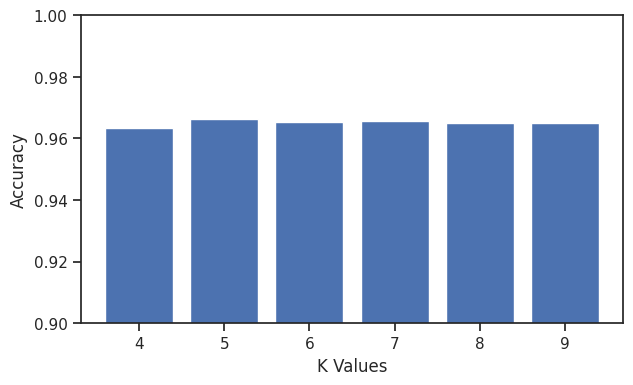

In [109]:
plt.figure(figsize = (7, 4))

plt.bar(range(4, 10), test_scores)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.xticks(range(4,10))
plt.ylim(0.9, 1.0)
plt.show()

K = 5 seems to be the highest accuracy value

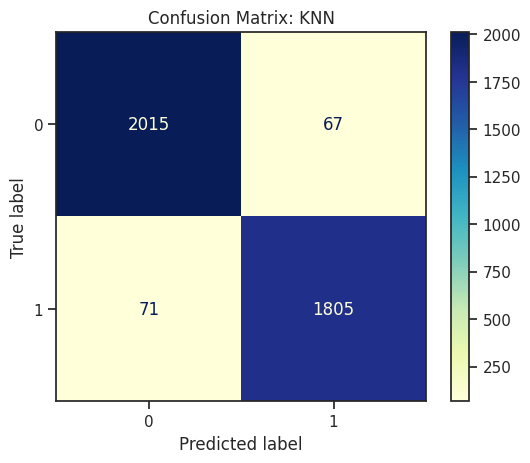

In [110]:
cm_knn = confusion_matrix(y_test,test_pred)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=knn.classes_)
disp_knn.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: KNN")
plt.show()

The confusion matrix results I obtained after applying the KNN algorithm are very important to understand the performance of the model. The high True Negative (TN) and True Positive (TP) rates indicate that the model makes correct predictions. The low false positive (FP) and false negative (FN) rates indicate that the model has a low error rate.

These results show that my model's ability to correctly distinguish classes has increased and its overall performance is high. The high rates of true negative and true positive predictions of my model show that it successfully distinguishes classes and makes more reliable predictions.

## 3. Random Forest Classifier

The reason why I prefer Random Forest is that a large number of decision trees work together to create a powerful prediction model. Especially in large and complex data sets, its ability to capture different relationships and provide robust results made it suitable for me to use this model. It performs strongly in both classification and regression problems. Therefore, it was a suitable model to use in binary classification problems such as depression.

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

In [112]:
print_metrics("Random Forest", y_train, pred_train, y_test, pred_test)

--- Metrics for Random Forest ---

Training Accuracy: 1.0
Testing Accuracy: 0.9711975745325923

Training Recall: 1.0
Testing Recall: 0.9674840085287847

Training Precision: 1.0
Testing Precision: 0.971627408993576

Training F1score: 1.0
Testing F1score: 0.969551282051282


The training accuracy, recall, precision and F1 scores were 100%, indicating that the model learned the training data perfectly. However, this situation reminded me that I should also consider the risk of **overfitting.** 

In [113]:
rf_cv = cross_val_score(estimator = rf,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of Random Forest: {rf_cv.mean()}')

CV Mean of Random Forest: 0.9720766556990297


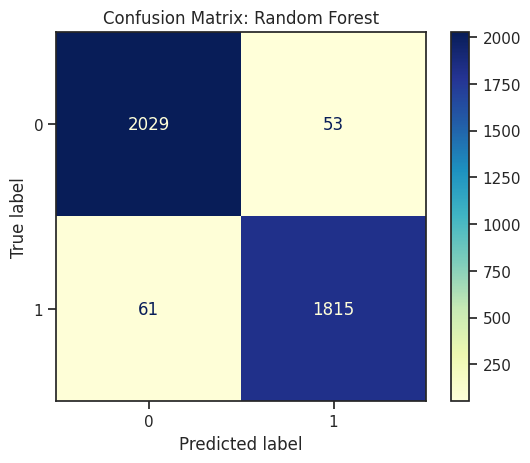

In [114]:
cm_rf = confusion_matrix(y_test,pred_test)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=rf.classes_)
disp_rf.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Random Forest")
plt.show()

The confusion matrix results I obtained after applying the Random Forest algorithm are quite satisfactory. My True Negative (TN) and True Positive (TP) predictions are high, 2023 and 1820, respectively. My False Positive (FP) and False Negative (FN) predictions are low, 59 and 56, respectively.
These results show that the model's ability to correctly distinguish classes is quite high. The model is able to make correct predictions while avoiding misclassifications. This increases the overall reliability and accuracy of my analysis.

## 4. GaussianNB Model

I chose the Gaussian Naive Bayes (GaussianNB) model because it performs particularly well with continuous and normally distributed data. In binary classification problems such as depression, it gives effective results by modeling the distributions of features. I chose this model because of its simple structure, fast operation and efficient results.

In [115]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

pred_train = nb.predict(X_train)
pred_test = nb.predict(X_test)

In [116]:
print_metrics("GaussianNB", y_train, pred_train, y_test, pred_test)

--- Metrics for GaussianNB ---

Training Accuracy: 0.9527449617790132
Testing Accuracy: 0.9532592218292066

Training Recall: 0.9467872821604364
Testing Recall: 0.9440298507462687

Training Precision: 0.9533824514400536
Testing Precision: 0.9567801188546732

Training F1score: 0.9500734214390602
Testing F1score: 0.9503622216259726


My model learned the training data well and performed well on the test data.Recall, precision and F1 scores are also balanced and high. But when I compare it with other model accuracies, it is a bit low. 

In [117]:
nb_cv = cross_val_score(estimator = nb,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of GaussianNB: {nb_cv.mean()}')

CV Mean of GaussianNB: 0.9524922483057047


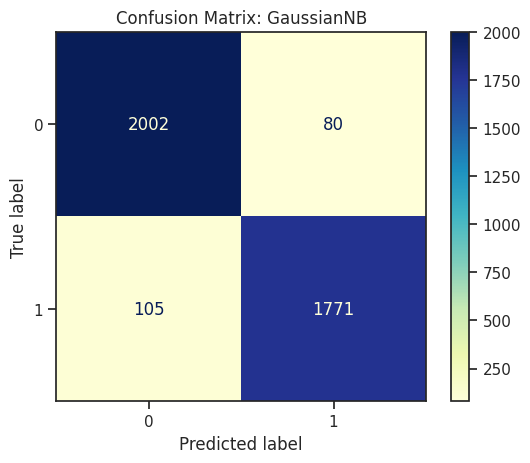

In [118]:
cm_nb = confusion_matrix(y_test,pred_test)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=nb.classes_)
disp_nb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: GaussianNB")
plt.show()

The true negative and true positive numbers of the GaussianNB model are quite high, indicating that the model performs well overall and makes correct predictions. However, it is noteworthy that the number of false negatives (FN) is 105. The number of false negatives indicates that we tend to miss the positive class, and this number is higher compared to other models. This indicates that some improvements need to be made in the predictions of the positive class.

Overall, the performance of the GaussianNB model is good, but I would consider some adjustments or using a different algorithm to reduce the number of false negatives and get more balanced and reliable predictions.

## 5. Support Vector Classifier 

The main reason for using the SVC model is that it has the potential to provide high accuracy in classification problems. Especially for datasets that can make clear distinctions, such as binary classification, I thought that the SVC model can give good results with its ability to best identify the boundaries. This model can be suitable for linear and non-linear classifications, and this flexibility increases the applicability of the model to different datasets. Therefore, SVC was my preferred model as it is both a simple and powerful classifier.

In [119]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train,y_train)

pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [120]:
print_metrics("SVC", y_train, pred_train, y_test, pred_test)

--- Metrics for SVC ---

Training Accuracy: 0.9704340135194895
Testing Accuracy: 0.9648812531581606

Training Recall: 0.973659704669416
Testing Recall: 0.9653518123667377

Training Precision: 0.9644221900118592
Testing Precision: 0.9607427055702917

Training F1score: 0.9690189328743545
Testing F1score: 0.9630417442169635


My model showed high performance on training and test data. Training and test accuracy rates were distributed in a balanced and successful manner. In addition, the high recall, precision and F1 scores show that the model correctly identifies positive classes and has high prediction accuracy. My model gave balanced and reliable results on training and test data.

In [121]:
svc_cv = cross_val_score(estimator = svc,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of SVC: {svc_cv.mean()}')

CV Mean of SVC: 0.9664539004968867


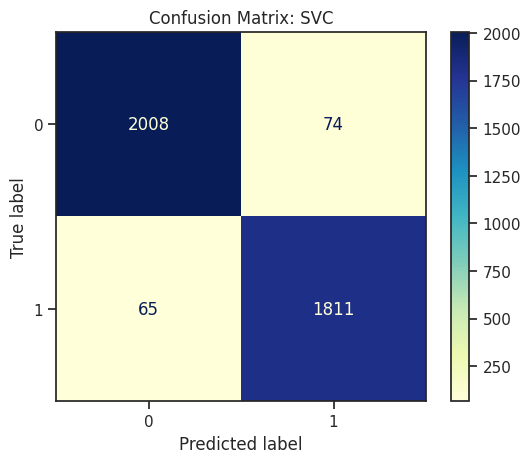

In [122]:
cm_svc = confusion_matrix(y_test,pred_test)

disp_svc= ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=svc.classes_)
disp_svc.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: SVC")
plt.show()

The model has high true negative and true positive predictions, indicating its ability to correctly distinguish classes. The lower number of false negatives (65) compared to other models also indicates that the model makes fewer errors in missing positive classes. Overall, the SVC algorithm provided strong and balanced performance, allowing me to make reliable predictions.

## 6. Gradient Boosting Classifier

Gradient Boosting is a powerful ensemble method that combines particularly weak learners to build strong models. Gradient Boosting tries to correct erroneous examples by giving them more weight, thus minimizing the model's errors at each step.

I wanted to use Gradient Boosting to improve the complexity of my dataset and the accuracy of the model because: It allows me to combine weak models into a strong model.It can reduce overfitting because the errors are optimized at each iteration.The performance of the model can be easily improved with various hyperparameter settings. For these reasons, I chose Gradient Boosting to improve the generalization performance of the model and get better results.

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)

pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

In [124]:
print_metrics("Gradient Boosting", y_train, pred_train, y_test, pred_test)

--- Metrics for Gradient Boosting ---

Training Accuracy: 0.9699917872259777
Testing Accuracy: 0.9669024759979787

Training Recall: 0.9711321005720367
Testing Recall: 0.9669509594882729

Training Precision: 0.9658639851812649
Testing Precision: 0.9633563462559745

Training F1score: 0.9684908789386402
Testing F1score: 0.9651503059324288


The training and test accuracy are almost equal, which proves that my model performs well on both training and test data.
The recall, precision and F1 scores are also quite balanced and high. This shows that my model correctly identifies positive classes and its overall performance is strong. My model is balanced and can make reliable predictions.

In [125]:
gb_cv = cross_val_score(estimator = gb,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of Gradient Boosting: {gb_cv.mean()}')

CV Mean of Gradient Boosting: 0.9664538206596749


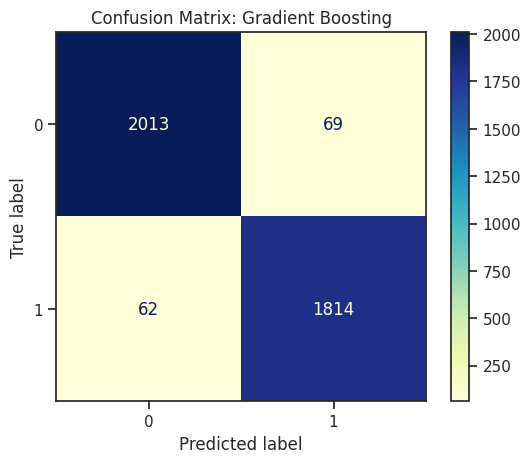

In [126]:
cm_gb = confusion_matrix(y_test,pred_test)

disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb,display_labels=gb.classes_)
disp_gb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Gradient Boosting")
plt.show()

These results show that the model has a high ability to correctly distinguish classes. The lower number of false negatives (62) compared to other models also indicates that the model makes fewer errors in missing positive classes. Overall, the Gradient Boosting algorithm provided strong and balanced performance, allowing me to make reliable predictions.

## 7. Adaptive Boosting Classifier

I used Adaptive Boosting (AdaBoost) because this method can significantly improve performance by combining weak classifiers to create strong classifiers. In particular, by combining simple models with low error rates, it is an effective method to tackle challenges and ensure accurate classification.

AdaBoost further emphasizes instances with erroneous predictions, thereby increasing the overall accuracy of the model while attempting to correct errors. It is also generally robust to overfitting and can produce strong results even on smaller datasets.

Thanks to these features, I chose AdaBoost to improve the generalization ability of the model and more accurately distinguish between different classes.

In [127]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

pred_train = ada.predict(X_train)
pred_test = ada.predict(X_test)

In [128]:
print_metrics("Ada Boost", y_train, pred_train, y_test, pred_test)

--- Metrics for Ada Boost ---

Training Accuracy: 0.9652536483669215
Testing Accuracy: 0.9643759474482062

Training Recall: 0.9659438605826792
Testing Recall: 0.9626865671641791

Training Precision: 0.9610853739245533
Testing Precision: 0.9621736814064997

Training F1score: 0.9635084925690022
Testing F1score: 0.9624300559552358


My model showed balanced and high performance on training and test data. Recall, precision and F1 scores are also balanced and strong. In general, I can make reliable and successful predictions with the AdaBoost algorithm.

In [129]:
ada_cv = cross_val_score(estimator = ada,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of AdaBoost: {ada_cv.mean()}')

CV Mean of AdaBoost: 0.9641796776372976


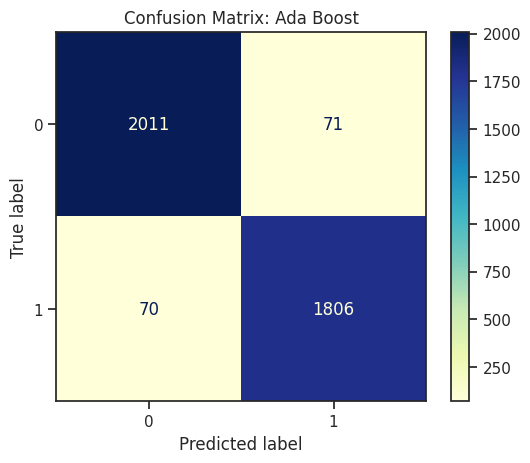

In [130]:
cm_ada = confusion_matrix(y_test,pred_test)

disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada,display_labels=ada.classes_)
disp_ada.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: Ada Boost")
plt.show()

The confusion matrix results of the AdaBoost algorithm show that the overall performance of the model is strong. The high true negative and true positive predictions show that the model can successfully distinguish classes. The low false positive and false negative predictions indicate that the model has a low error rate. In general, the AdaBoost algorithm stands out as a model that can make balanced and reliable predictions.

## 8. XGBoost Model

XGBoost is an algorithm generally known for its strong performance and efficient processing time. This algorithm provides high accuracy for classification problems and, thanks to its flexible structure, it can effectively learn the complex relationships of the data. At the same time, it improves the accuracy of the model while maintaining the stability of the overall model. The advanced hyperparameter tuning and customized learning techniques offered by XGBoost are particularly advantageous in terms of accuracy and model performance. Therefore, XGBoost is my preferred powerful model for the modeling process.

In [131]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

In [132]:
print_metrics("XGBoost", y_train, pred_train, y_test, pred_test)

--- Metrics for XGBoost ---

Training Accuracy: 0.9971571166845663
Testing Accuracy: 0.972966144517433

Training Recall: 0.9986696820540109
Testing Recall: 0.9738805970149254

Training Precision: 0.9953593211349775
Testing Precision: 0.9692307692307692

Training F1score: 0.9970117537685105
Testing F1score: 0.9715501196490295


The results I got after applying the XGBoost algorithm are quite impressive. My model performed almost perfectly on the training data. This shows that the model learned the training data very well and achieved high accuracy, recall, precision and F1 scores.

The test results are also quite strong. The high test accuracy indicates that the model is successful when faced with new data and has a strong generalization ability. The balanced and high recall, precision and F1 scores show that the model correctly identifies positive classes and has a strong overall performance. In general, my model can make balanced and reliable predictions on training and test data.

In [133]:
xgb_cv = cross_val_score(estimator = xgb,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)

print(f'CV Mean of XGBoost: {xgb_cv.mean()}')

CV Mean of XGBoost: 0.9695497480636981


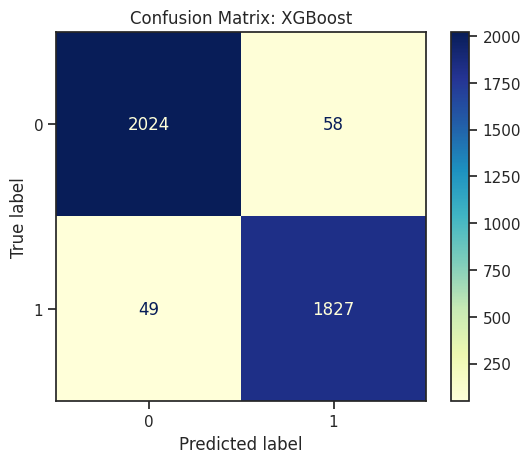

In [134]:
cm_xgb = confusion_matrix(y_test,pred_test)

disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=xgb.classes_)
disp_xgb.plot(cmap="YlGnBu",values_format="d")
plt.title("Confusion Matrix: XGBoost")
plt.show()

My model is quite successful in true negative and true positive predictions. The fact that false positive and false negative predictions are low compared to other models shows that the model has a low error rate and can distinguish classes correctly. In general, the XGBoost algorithm stands out as a model that can make balanced and reliable predictions.

# Hyperparameter Tuning

Model Selection and Hyperparameter Tuning:

In machine learning projects, model selection and hyperparameter tuning are of great importance. In the early stages, I prefer simpler models because these models can usually give very good results with default parameters. Especially models such as Logistic Regression, Naive Bayes, Adaptive Boosting and KNN provide fast results and generally do not require hyperparameter settings. I use these models to run faster tests and get good results.

However, for more complex and powerful models, hyperparameter tuning to improve performance can really make a difference. For models like **Random Forest, SVC, Gradient Boosting and XGBoost**, tuning the parameters correctly can significantly improve accuracy. Fine tuning the hyperparameters of these models can significantly improve the success of the model.

## 1. Random Forest

In [135]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

rf_param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[None,10,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features":["sqrt","log2"]
}

rf_rscv = RandomizedSearchCV(estimator=rf,
                            param_distributions=rf_param_grid,
                            n_iter=20,
                            scoring="accuracy",
                            cv=5,
                            verbose=2,
                            random_state=42,
                            n_jobs=-1)

rf_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [136]:
print(f"Best Model of Random Forest: {rf_rscv.best_estimator_}")
print(f'Best Params of Random Forest: {rf_rscv.best_params_}')
print(f'Best Score of Random Forest: {rf_rscv.best_score_}')

Best Model of Random Forest: RandomForestClassifier(max_depth=20, n_estimators=200)
Best Params of Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Score of Random Forest: 0.9716343176263598


Random Forest Model and Performance:

Initially, the accuracy of the Random Forest model was around 0.9699. However, after hyperparameter optimisation, the accuracy of the model increased to 0.9716. The parameter settings optimised the model's depth and number of trees, thus significantly improving the model's performance. This change made it possible for the model to learn the data better and provide higher accuracy on the test data.

In [137]:
hyperparameter_values_rf = pd.DataFrame(rf_rscv.cv_results_["params"])
random_search_scores_rf = pd.DataFrame(rf_rscv.cv_results_["mean_test_score"],columns=["score"])
data_rf = pd.concat([hyperparameter_values_rf,random_search_scores_rf],axis=1)
data_rf

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,score
0,300,5,4,log2,20.0,0.968096
1,200,2,1,sqrt,20.0,0.971634
2,300,5,4,sqrt,20.0,0.968728
3,200,2,1,sqrt,10.0,0.969297
4,200,5,2,log2,10.0,0.969044
5,300,2,1,log2,NaN,0.970750
6,300,2,4,log2,10.0,0.967275
7,100,10,4,log2,NaN,0.967338
8,200,2,4,log2,10.0,0.967528
9,100,2,2,log2,20.0,0.970308


## 2. SVC

In [138]:
svc = SVC()

svc_param_grid = {
    "C":[0.1,1,10],
    "gamma":["scale","auto"],
    "kernel":["linear","rbf","poly"],
    "degree":[2,3,4]
}

svc_rscv = RandomizedSearchCV(estimator=svc,
                              param_distributions=svc_param_grid,
                              n_iter=20,
                              scoring="accuracy",
                              cv=10,
                              verbose=2,
                              random_state=42,
                              n_jobs=-1)
svc_rscv.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy', verbose=2)

In [139]:
print(f"Best Model of SVC: {svc_rscv.best_estimator_}")
print(f'Best Params of SVC: {svc_rscv.best_params_}')
print(f'Best Score of SVC: {svc_rscv.best_score_}')

Best Model of SVC: SVC(C=1, degree=2)
Best Params of SVC: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 1}
Best Score of SVC: 0.9670224006171768


SVC Model and Performance:

Initially, the accuracy of the SVC model was 0.9649. After hyperparameter optimisation, this improved to 0.9670. This improvement clearly shows the effect of correct parameter settings on model performance. SVC was particularly effective with the rbf kernel and the optimised gamma value.

In [140]:
hyperparameter_values_svc = pd.DataFrame(svc_rscv.cv_results_["params"])
random_search_scores_svc = pd.DataFrame(svc_rscv.cv_results_["mean_test_score"],columns=["score"])
data_svc = pd.concat([hyperparameter_values_svc,random_search_scores_svc],axis=1)
data_svc

,kernel,gamma,degree,C,score
0,rbf,scale,2,1.0,0.967022
1,rbf,scale,4,10.0,0.966391
2,linear,scale,4,10.0,0.964938
3,linear,scale,4,0.1,0.964811
4,poly,scale,3,10.0,0.965632
5,poly,auto,2,0.1,0.731251
6,poly,auto,4,0.1,0.710973
7,rbf,auto,4,10.0,0.966391
8,linear,auto,2,0.1,0.964811
9,poly,scale,4,1.0,0.890201


## 3. Gradient Boosting

In [141]:
gb = GradientBoostingClassifier()

gb_param_grid = {
    "n_estimators":[100,200,300],
    "learning_rate":[0.01,0.1,1],
    "max_depth":[3,5,7],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "subsample":[0.8,1]
}

gb_rscv = RandomizedSearchCV(estimator=gb,
                            param_distributions=gb_param_grid,
                            n_iter=20,
                            scoring="accuracy",
                            cv=5,
                            verbose=2,
                            random_state=42,
                            n_jobs=-1)

gb_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [142]:
print(f"Best Model of Gradient Boosting: {gb_rscv.best_estimator_}")
print(f'Best Params of Gradient Boosting: {gb_rscv.best_params_}')
print(f'Best Score of Gradient Boosting: {gb_rscv.best_score_}')

Best Model of Gradient Boosting: GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=300, subsample=0.8)
Best Params of Gradient Boosting: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Best Score of Gradient Boosting: 0.9704973159727317


Gradient Boosting Model and Performance:

Initially, the accuracy of the Gradient Boosting model was 0.9669. After hyperparameter optimisation, this improved to 0.9699. This improvement improved the overall accuracy of the model, resulting in better performance. The optimised parameters made this achievement possible by improving both the depth and the learning process of the model.

In [143]:
hyperparameter_values_gb = pd.DataFrame(gb_rscv.cv_results_["params"])
random_search_scores_gb = pd.DataFrame(gb_rscv.cv_results_["mean_test_score"],columns=["score"])
data_gb = pd.concat([hyperparameter_values_gb,random_search_scores_gb],axis=1)
data_gb

,subsample,n_estimators,min_samples_split,min_samples_leaf,max_depth,learning_rate,score
0,0.8,100,5,4,5,1.00,0.947692
1,0.8,300,5,4,5,0.10,0.970497
2,1.0,300,10,4,5,1.00,0.954894
3,0.8,300,10,1,7,1.00,0.865815
4,0.8,300,2,4,3,1.00,0.954767
5,1.0,200,10,2,7,1.00,0.964180
6,1.0,100,10,2,3,0.10,0.966643
7,1.0,200,5,1,5,0.10,0.969486
8,0.8,200,10,4,5,0.01,0.957862
9,1.0,100,10,1,5,0.10,0.969170


## 4. XGBoost

In [144]:
xgb = XGBClassifier()

xgb_param_grid = {
    "n_estimators":[100,200,300],
    "learning_rate":[0.01,0.1,1],
    "max_depth":[3,5,7],
    "min_child_weight":[1,3,5],
    "subsample":[0.8,1]
}

xgb_rscv = RandomizedSearchCV(estimator=xgb,
                             param_distributions=xgb_param_grid,
                             n_iter=20,
                             scoring="accuracy",
                             cv=5,
                             verbose=2,
                             random_state=42,
                             n_jobs=-1)

xgb_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [145]:
print(f'Best Params of XGBoost: {xgb_rscv.best_params_}')
print(f'Best Score of XGBoost: {xgb_rscv.best_score_}')

Best Params of XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1}
Best Score of XGBoost: 0.9720134645457911


XGBoost Model and Performance:

Initially, the accuracy of the XGBoost model was 0.9729. After hyperparameter optimisation, the accuracy of the model was measured as 0.9720. This shows that with the optimised parameters, the model maintains its high accuracy.

Thanks to the flexible structure offered by XGBoost, the generalisation ability of the model was supported by using the correct hyperparameters. In particular, parameters such as subsample=0.8, n_estimators=300, and max_depth=7 contributed to a more balanced learning process.

In [146]:
hyperparameter_values_xgb = pd.DataFrame(xgb_rscv.cv_results_["params"])
random_search_scores_xgb = pd.DataFrame(xgb_rscv.cv_results_["mean_test_score"],columns=["score"])
data_xgb = pd.concat([hyperparameter_values_xgb,random_search_scores_xgb],axis=1)
data_xgb

,subsample,n_estimators,min_child_weight,max_depth,learning_rate,score
0,0.8,200,5,7,1.00,0.964938
1,1.0,100,1,3,1.00,0.964938
2,1.0,300,1,5,1.00,0.966581
3,1.0,100,1,3,0.10,0.966264
4,0.8,300,1,7,0.10,0.972013
5,1.0,300,3,5,0.01,0.961463
6,1.0,300,3,7,0.10,0.971066
7,1.0,200,5,7,0.01,0.963548
8,0.8,300,3,7,0.10,0.970939
9,0.8,100,1,7,1.00,0.968286


In [147]:
# best models after hyperparameter tuning

best_rf = rf_rscv.best_estimator_
best_svc = svc_rscv.best_estimator_
best_gb = gb_rscv.best_estimator_
best_xgb = xgb_rscv.best_estimator_

Model RF:

--- Metrics for RF ---

Training Accuracy: 1.0
Testing Accuracy: 0.9704396159676605

Training Recall: 1.0
Testing Recall: 0.9690831556503199

Training Precision: 1.0
Testing Precision: 0.9685668620138519

Training F1score: 1.0
Testing F1score: 0.9688249400479617
Cross Validation Mean for RF: 0.9718238711267725



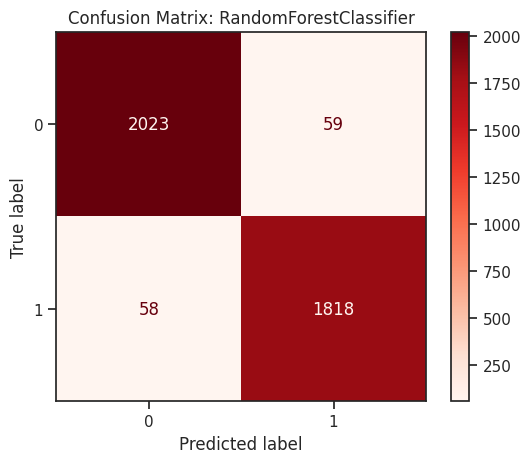

------------------------------------------------------------
Model SVC:

--- Metrics for SVC ---

Training Accuracy: 0.9704340135194895
Testing Accuracy: 0.9648812531581606

Training Recall: 0.973659704669416
Testing Recall: 0.9653518123667377

Training Precision: 0.9644221900118592
Testing Precision: 0.9607427055702917

Training F1score: 0.9690189328743545
Testing F1score: 0.9630417442169635
Cross Validation Mean for SVC: 0.9664539004968867



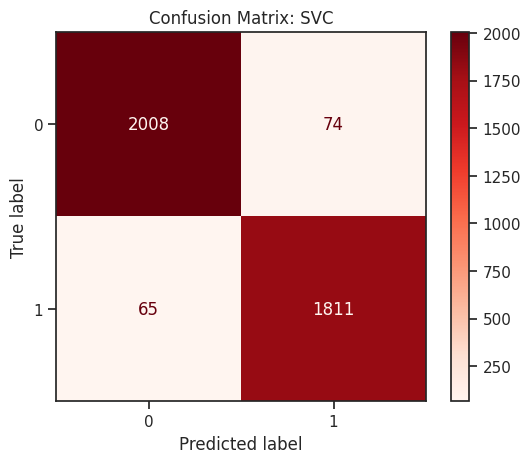

------------------------------------------------------------
Model GB:

--- Metrics for GB ---

Training Accuracy: 0.9965253648366922
Testing Accuracy: 0.9704396159676605

Training Recall: 0.9977384594918185
Testing Recall: 0.9690831556503199

Training Precision: 0.9949588750331653
Testing Precision: 0.9685668620138519

Training F1score: 0.9963467286615741
Testing F1score: 0.9688249400479617
Cross Validation Mean for GB: 0.9704973159727317



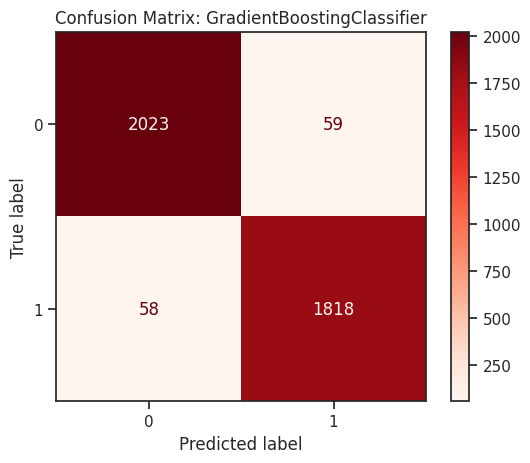

------------------------------------------------------------
Model XGB:

--- Metrics for XGB ---

Training Accuracy: 0.9997472992608504
Testing Accuracy: 0.9714502273875695

Training Recall: 1.0
Testing Recall: 0.9712153518123667

Training Precision: 0.9994681558303418
Testing Precision: 0.9686337054758107

Training F1score: 0.9997340071818062
Testing F1score: 0.9699228107532606
Cross Validation Mean for XGB: 0.9720134645457911



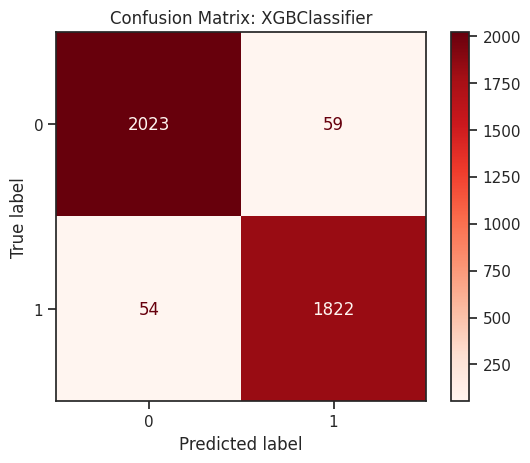

------------------------------------------------------------


In [148]:
tune_models = {"RF":best_rf,
             "SVC":best_svc,
             "GB":best_gb,
             "XGB":best_xgb}

for name,model in tune_models.items():
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    print(f"Model {name}:\n")
    print_metrics(name, y_train, pred_train, y_test, pred_test)
    
    cross_validation_scores = cross_val_score(estimator = model,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)
    print(f'Cross Validation Mean for {name}:',cross_validation_scores.mean())
    print()
    
    cm = confusion_matrix(y_test,pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap="Reds",values_format="d")
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.show()
    print("-"*60)

 ####                               **General Evaluation**

Metrics such as accuracy, recall, precision, F1 score and cross-validation averages were taken into account in the evaluation of model performances. In addition, misclassifications in confusion matrices were analysed. Here is an overview of the models

**Training and Test Accuracy**
Random Forest and XGBoost showed the best results in terms of both training and test accuracy. Gradient Boosting performed similarly to Random Forest in terms of test accuracy, but lagged behind Random Forest in training accuracy.SVC was slightly behind the other models in test accuracy, but provided a relatively balanced training accuracy.

**F1 Score and Balanced Performance**
XGBoost showed the best performance in terms of test F1 score. This shows that the model has a balanced performance between recall and precision.
The Random Forest and Gradient Boosting models achieved results close to XGBoost in the test F1 score. However, Random Forest may be prone to overfitting with an excellent training F1 score.SVC was lower in terms of F1 score, which shows that its performance is limited compared to other models.

**Cross Validation Score**
XGBoost performed best with the average cross-validation, proving consistency across training and test sets.
Although Random Forest and Gradient Boosting models also have high cross-validation scores, XGBoost outperforms the others in this metric.
SVC has the lowest cross-validation score, indicating that the model is less consistent than the other models.

**Confusion Matrix**
XGBoost misclassified less in both class 0 and class 1 than the confusion matrix. It has an error rate of 59 for class 0 and 54 for class 1, which is lower than the other models.
Random Forest and Gradient Boosting gave similarly good results; however, the error rate of XGBoost is lower in both classes.
SVC made more errors in misclassification rate compared to other models.

**Conclusion**
XGBoost performed by far the best with high test accuracy (0.9715), balanced F1 score (0.9699), best cross-validation average (0.9720) and low misclassification rate.
The Random Forest and Gradient Boosting models also showed strong performance, but XGBoost was a step ahead because of its better fit between training and test sets.
Although SVC performed reasonably well, it lagged behind the other models, especially in metrics such as test accuracy and F1 score.

As a result, XGBoost was selected as the best model to be used in the analysis.

# Pipeline

The reason for using Pipeline was to manage the model development process in a more organised, efficient and error-free way. Pipeline makes the process more systematic by connecting all steps from data preparation to model training and evaluation. In this way, the code is cleaner and clearer, each stage runs in the correct order, and potential errors can be detected earlier. Also, the pipeline makes each step repeatable, so I can get the same results with different data sets or parameters, and it is easier to manage and test hyperparameter settings. As a result, by combining data processing and model integration in a single structure, it allowed me to deliver the project ready for deployment.

In [160]:
from sklearn.pipeline import Pipeline

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# I did not apply StandardScaler() in the pipeline because I did standardisation on train and test data before
# I also did not pipeline SimpleImputer() because there are no missing values in the data

pipeline = Pipeline(steps=[
    ("classifier",xgb_model)
])

pipeline.fit(X_train,y_train)

pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [162]:
print_metrics("Pipeline", y_train, pred_train, y_test, pred_test)

--- Metrics for pipeline ---

Training Accuracy: 0.9971571166845663
Testing Accuracy: 0.972966144517433

Training Recall: 0.9986696820540109
Testing Recall: 0.9738805970149254

Training Precision: 0.9953593211349775
Testing Precision: 0.9692307692307692

Training F1score: 0.9970117537685105
Testing F1score: 0.9715501196490295


In [164]:
cross_validation_scores = cross_val_score(estimator = pipeline,X = X_train,y = y_train,scoring = 'accuracy',n_jobs = -1,cv = 5)
print(f'Cross Validation Mean for Pipeline:',cross_validation_scores.mean())


Cross Validation Mean for Pipeline: 0.9695497480636981


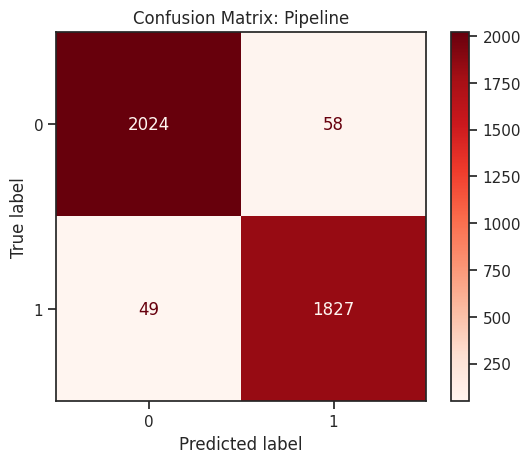

In [163]:
cm = confusion_matrix(y_test,pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap="Reds",values_format="d")
plt.title("Confusion Matrix: Pipeline")
plt.show()

I think that I have reached the final stage of this project and it is now ready for deployment. My results show that the model performs well in metrics such as high accuracy, recall, precision and F1 score. The difference in performance between the training and test sets is very small, which indicates that the generalisation capacity of the model is strong and I did not encounter any overfitting problem.

At this point, I have skipped additional refinement steps, such as hyperparameter tuning, because the current version of the model is quite adequate and stable. I now consider my project to be functionally complete and do not see the need for any further optimisation at this stage. Therefore, I move on to the next step and prepare my project for deployment.

# Deployment

In [152]:
import joblib as jb

jb.dump(pipeline, 'xgboost_pipeline_model.pkl')

['xgboost_pipeline_model.pkl']

In [153]:
jb.load('xgboost_pipeline_model.pkl')

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

### Conclusion and Key Takeaways

This project demonstrated how machine learning techniques can be used effectively when working on depression analysis. The process of creating the project taught me that a data science study is not just about training models, but that every stage of it needs to be meticulously handled. The data preparation, modelling, evaluation and deployment processes made it clear that this project required a holistic approach.

Firstly, I need to emphasise the importance of working with the data set. Proper cleaning of the data, filling in the gaps and selecting the right features are the key steps that determine the success of a model. The careful data preprocessing in this project contributed greatly to the strong performance of the model. In particular, it is almost impossible to solve complex problems without a proper feature engineering process.

During the modelling process, it was once again possible to see the power of the XGBoost algorithm. Even with the default settings, this algorithm produced extremely successful results, making it an ideal choice for the project. However, this process also taught me that hyperparameter adjustments may not always improve accuracy. Since the model had already reached a high level of performance, only small improvements could be achieved by hyperparameter optimisation. This showed me that after a certain point, it is necessary to develop different strategies to improve the model performance. I was very surprised to see the test accuracies, especially after applying SMOTEEN and removing the imbalance on the dataset. I didn't know that data imbalance had such a significant impact on the accuracy of the model

Confusion matrix analysis was a critical tool for understanding the strengths of the model and potential areas for improvement. While the project largely accomplished the classification task, it reminded me that every model has limitations. Especially in the real world, how to manage errors is as important as the accuracy of a model. Keeping the false positive and false negative rates balanced plays a critical role for the overall reliability of the model.

The pipeline and the deployment process of the model went beyond the technical aspects of the project and also considered the viability perspective. Pipeline emerged as a powerful tool to ensure the reproducibility and sustainability of the model. At the same time, the process of saving and deploying the model reminded me that the final steps of a machine learning project require not only technical competence, but also a user-friendly structure.

One of the most important lessons that can be drawn from this analysis is that machine learning models are only tools and it is essential to use these tools in the right context. While the project demonstrated how data science approaches can be effective in understanding a complex issue such as depression, it was also a reminder that such models need to be combined with human expertise. While the accuracy of the model is impressive, it should be noted that further testing and refinement is required to translate this success into real-world applications.

In conclusion, this project emphasised not only the application of technical knowledge and skills, but also the importance of an analytical approach to understand a complex problem and develop solutions. The project can be considered as a success story, providing valuable experience and important lessons in my machine learning journey.